In [1]:
#!jt -t chesterish -T
!jt -r

Reset css and font defaults in:
C:\Users\user\.jupyter\custom &
C:\Users\user\AppData\Roaming\jupyter\nbextensions


# Parametros base

Precio promedio(General)
Graficos series de tiempo



Se estudiará primero con el `Tipo_de_Cliente` = **Tradicional** que es el segmento de interes.

Ademas los graficos se presentaran todos para el producto de interes `Y_producto` = __1010078__

In [2]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================
start_time_0 = time.time()

In [3]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

# Ordenador de escritorio
file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'

"""
#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
"""

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'

In [4]:
#===================================
# Dicionario 
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

# Intalar paquetes, Abrir data y ajustarla 

## import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

from sklearn.model_selection import train_test_split

In [6]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


El que combina a ambos `DF_Full`

###  Ventas

In [7]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_V = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
data_V.drop('Año natural', inplace=True, axis=1)
data_V.head(1)

Zona de ventas Zona de ventas.1   Cliente           Cliente.1  \
0           Z001         Santiago  10003742  Ferrer Leiva Sonia   

      Cliente - Local Cliente - Local.1 Material Día natural Kilos Venta KG  \
0  Ferrer Leiva Sonia             38458  1010077  09.02.2018             12   

  Venta Neta  ...            Centro.1   Población Tipo de cliente  Cluster  \
0     13.685  ...  Sucursal Lo Espejo  La Pintana     Tradicional  Clásico   

  Segmento            Segmento.1     Categoría Cliente Zona de reparto  \
0       50  Cobertura Pequeno SD  Especialista en Proc      1513112010   

  Año Creación Material Favorito  
0         2007           1010077  

[1 rows x 23 columns]

In [8]:
data_V[['Material','Kilos Venta KG','Venta Neta','Precio Promedio','Día natural']].head()

Material Kilos Venta KG Venta Neta Precio Promedio Día natural
0  1010077             12     13.685           1.190  09.02.2018
1  1010077             12     15.660           1.350  04.05.2018
2  1010077             12     14.388           1.250  22.06.2018
3  1010077             12     12.753           1.090  26.10.2018
4  1010077             12     14.887           1.290  08.03.2019

#### Funcion

In [9]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    for i in df.columns.to_list():
        df=df[df[i].notna()]

    #========================================
    # Funcion para asignar el tipo de cambio
    #----------------------------------------
    def categ_uniq(x):   
        y=str(x)
        y=y[len(y)-3:]
        if(y=='USD'):
            return y
        else:#if(x[len(x)-3:]=='CLP'):
            return 'CLP'

    #df['Unidad Venta']=df['Venta Neta'].apply(categ_uniq)
    #df['Unidad Precio']=df['Precio Promedio'].apply(categ_uniq)



    #==========================================================
    # Cambio de las comas y valores
    #----------------------------------------------------------
    def CLP_Dolar(x):
        x=str(x)
        x=x.replace('.', '')
        x=x.replace(',', '.')
        x=str(x)
        if(x[len(x)-3:]=='USD'):
            x=x.split(' USD')[0]
            x= None
            #x=x*720
        elif(x[len(x)-3:]=='CLP'):
            x=x.split(' CLP')[0]
            x=float(x)
        return x

    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        if(x=='*'):
            x=''
        else:
            x
        return x


#=====================================================
#proceso iterativo:
#=====================================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].apply(CLP_Dolar)
        else:
            df[i]=df[i].apply(change_num_point)
            # se reemplaza la coma por un punto, para definir los decimales correctamente
            df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        df=df[df[i].notna()]
        df=df[df[i]!='None']
        df[i]=df[i].astype('float64')
        # Se pasa de ser un str a un int
        print(i)
        #df[i]=df[i].astype('int64')



    #==========================================================================================
    # Ajuste de las fechas
    #-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%d.%m.%Y').date())
        #Separacion fecha
    df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    df['Mes']=df["Día natural"].apply(lambda x: x.month)
    df['Año']=df["Día natural"].apply(lambda x: x.year)

    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    end_time = time.time()

    time_convert(end_time - start_time)
    return df

In [10]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(data_V)

Kilos Venta KG
Venta Neta
Precio Promedio
Time Lapsed = 0:0:20.002171277999878 
 H:m:s


### Data Productos 

In [11]:
name_archivo= 'Detalles de los productos'+'.csv'

file_direct=file_direct_Clear+ name_archivo

col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_Products = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)

print(DF_Products.iloc[1,:])

print(DF_Products.shape)
DF_Products=DF_Products[DF_Products['Año natural']=='2021']
print(DF_Products.shape)
DF_Products=DF_Products.reset_index()
DF_Products=DF_Products[['Material',
 'Nivel 4',
 'Nivel 4.1',
 'Sector',
 'Tipo de material',
 'Tipo de material.1',
 'Marca',
 'Nivel 2',
 'Granel/Envasado',
 'Marinado',
 'Nivel 3',
 'Grupo artículos',
 'Estado',
 'Estandar',
 'Envase']]
DF_Products.tail(1)

Sector                                 Cerdo
Tipo de material                        ZCER
Tipo de material.1        Prod. Term. Cerdos
Marca                       SUPER CERDO (SC)
Nivel 2                              Chuleta
Granel/Envasado                       GRANEL
Marinado                            MARINADO
Material                             1020027
Nivel 3                       Chuleta Vetada
Nivel 4                           2002036179
Nivel 4.1             Chuleta Vetada Repasad
Grupo artículos                        02020
Estado                           REFRIGERADO
Estandar                       PESO VARIABLE
Envase                          NO CONGELADO
Año natural                             2019
Kilos Venta KG                     3.615.396
Venta Neta                 6.676.505.142 CLP
Precio Promedio                    1.847 CLP
Name: 1, dtype: object
(52, 19)
(13, 19)


Material     Nivel 4                Nivel 4.1 Sector Tipo de material  \
12  1010077  1014022073  Trutro Entero Selección  Pollo             ZAVE   

   Tipo de material.1             Marca Nivel 2 Granel/Envasado  Marinado  \
12   Prod. Term.  Ave  SUPER POLLO (SP)  Trutro          GRANEL  MARINADO   

          Nivel 3 Grupo artículos       Estado       Estandar        Envase  
12  Trutro Entero           01050  REFRIGERADO  PESO VARIABLE  NO CONGELADO

### Merge con datos

In [12]:
DF_Full=pd.merge(data , DF_Products 
     , how='inner')
print(DF_Full.shape)
print(DF_Full.columns.to_list())

time_convert(time.time()-start_time_0)

DF_Full.head(3)

(1061161, 40)
['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1', 'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural', 'Kilos Venta KG', 'Venta Neta', 'Precio Promedio', 'Frecuencia Historica', 'Centro', 'Centro.1', 'Población', 'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1', 'Categoría Cliente', 'Zona de reparto', 'Año Creación', 'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1', 'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2', 'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado', 'Estandar', 'Envase']
Time Lapsed = 0:0:27.028596878051758 
 H:m:s


Zona de ventas Zona de ventas.1   Cliente           Cliente.1  \
0           Z001         Santiago  10003742  Ferrer Leiva Sonia   
1           Z001         Santiago  10003742  Ferrer Leiva Sonia   
2           Z001         Santiago  10003742  Ferrer Leiva Sonia   

      Cliente - Local Cliente - Local.1 Material Día natural  Kilos Venta KG  \
0  Ferrer Leiva Sonia             38458  1010077  2018-02-09            12.0   
1  Ferrer Leiva Sonia             38458  1010077  2018-05-04            12.0   
2  Ferrer Leiva Sonia             38458  1010077  2018-06-22            12.0   

   Venta Neta  ...  Tipo de material.1             Marca Nivel 2  \
0     13685.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   
1     15660.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   
2     14388.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   

  Granel/Envasado  Marinado        Nivel 3 Grupo artículos       Estado  \
0          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   
1          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   
2          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   

        Estandar        Envase  
0  PESO VARIABLE  NO CONGELADO  
1  PESO VARIABLE  NO CONGELADO  
2  PESO VARIABLE  NO CONGELADO  

[3 rows x 40 columns]

In [13]:
#Ajuste Material
def material_name(x):
    s1=str(x['Material'])
    s2=str(x['Nivel 4.1'])
    return(s1+'\n ('+s2+')')
#df['Material Nombre']=df.apply(lambda x:  material_name(x), axis=1)
DF_Full['Material Nombre']=DF_Full.apply(lambda x:  material_name(x), axis=1)

In [14]:
time_lapsed = time.time() - start_time_0
time_convert(time_lapsed)

Time Lapsed = 0:0:36.916423320770264 
 H:m:s


## Diciconario columnas 
Dic_col

In [25]:
Dic_col={
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Población', 'Centro.1'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica']
         ,'Base1':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio Promedio','Cliente']
        ,'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente']
        }

## Prueba


In [15]:
len(DF_Full.Cliente.unique())

7560

# Box plot material Cliente 
Material Precios y volumen por venta


##### Data

In [17]:
#'Material Nombre'
DF_Full.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Frecuencia Historica', 'Centro', 'Centro.1', 'Población',
       'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1',
       'Categoría Cliente', 'Zona de reparto', 'Año Creación',
       'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1',
       'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2',
       'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado',
       'Estandar', 'Envase', 'Material Nombre'],
      dtype='object')

In [18]:
df=DF_Full.copy()

## Filtrado 


### Preguntas de Filtrado

- De las transacciones que se encuentran en los datos 
__¿Qué porcentaje de ellas sobrepasa la media tonelada?__

- De los regristros de cada canal 
__¿Qué porcentaje de las facturaciones de cada canal sobrepasan la media tonelada?__

- Para cada canal, 
__¿Qué porcentaje de clientes del canal, en promedio de sus transacciones (por material o ind) sobrepasan la media tonelada?__

__¿Qué porcentaje de clientes del canal, en promedio de sus transacciones (por material o ind) sobrepasan la media tonelada?__

__Plan de trabajo:__
1. Hacer un grouoby que calcule el proemdio de las toneladas, por cliente, para así estiamr el pedido promedio de cad cliente.
2. Atributos de estos clientes que deben ser guardados
    - Tipo de cliente (Canal)
    -  Material tal vez
    - Año
3. tomar en cuenta que entre más atributos en el primer groupby, se segmenta a tal que el analisis puiede ser erroneo.

4. desde el groupby, se crea un dataframe, este se utiliza para segmentar al numero de clientes que tienen en promedio un pedido sobre la tonelada o media tonelada, para cada _Canal, Material(Esto despues).

#####  preguntas 1 a 2

- De las transacciones que se encuentran en los datos 
__¿Qué porcentaje de ellas sobrepasa la media tonelada?__

- De los regristros de cada canal 
__¿Qué porcentaje de las facturaciones de cada canal sobrepasan la media tonelada?__

In [19]:
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'

###### Distribucion por año

In [20]:
df[[y_G,'Material Nombre','Tipo de cliente']].std()

Kilos Venta KG    283.730126
dtype: float64

In [21]:
df[[y_G,'Material Nombre','Año','Tipo de cliente']].groupby('Año').describe()

Kilos Venta KG                                                        
              count        mean         std  min   25%   50%   75%      max
Año                                                                        
2018       213313.0  112.664310  380.169175  1.0  22.0  39.0  74.0  52550.0
2019       249591.0   92.700598  265.690788  2.0  22.0  39.0  67.0  21625.0
2020       307305.0   86.048746  274.389800  2.0  22.0  36.0  66.0  23767.0
2021       290952.0   78.248402  216.878064  2.0  22.0  36.0  66.0  23710.0

###### Porcentaje de las transacciones por MATERIAL, que sobrepasan la  tonelada

In [22]:
Segm='Material Nombre'

Proporci=[]
for m in df[Segm].unique():
    Proporci.append(df[(df[Segm]==m)&
                       (df[y_G]>0.5*10**3)
                      ].shape[0]/\
     df[(df[Segm]==m)].shape[0]*100)

df_Proporci=    pd.DataFrame(
    { Segm:df[Segm].unique(),
    'Casos sobre tonelada %':Proporci
    })
print('Promedio',(df_Proporci.iloc[:,1]).mean())
df_Proporci

Promedio 3.2944663764705164


Material Nombre  Casos sobre tonelada %
0        1010077\n (Trutro Entero Selección)                0.266862
1        1010078\n (Trutro Entero Selección)                3.376686
2       1010048\n (Pechuga Entera Selección)                2.559433
3                1020253\n (Pierna Pulpa 57)                1.816723
4         1020042\n (Chuleta Cazuela Entera)                1.357191
5         1020027\n (Chuleta Vetada Repasad)                2.051098
6       1020013\n (Paleta Entera s/Plateada)                7.833347
7                1020010\n (Pierna Pulpa 59)                3.157066
8   1020003\n (Cost-Pec Entero Costillar 79)                2.517837
9                 1020001\n (Chuleta Centro)                1.126156
10          1010695\n (Trutro Cuarto Normal)               12.345176
11         1010002\n (Con Menudencia >2.130)                1.986708
12        1010267\n (Pechuga Desh S/calibre)                2.433779

###### Porcentaje de las transacciones por CANAL que sobrepasan la media tonelada

codigo

In [23]:
Segm='Tipo de cliente'
Proporci=[]
for m in df[Segm].unique():
    Proporci.append(df[(df[Segm]==m)&
                       (df[y_G]>0.5*10**3)
                      ].shape[0]/\
     df[(df[Segm]==m)].shape[0]*100)

df_Proporci=    pd.DataFrame(
    { Segm:df[Segm].unique(),
    'Casos sobre tonelada %':Proporci
    })
out=[
('Promedio',(df_Proporci.iloc[:,1]).mean())
,('Promedio excluyendo a grandes clientes',df_Proporci[
    df_Proporci[Segm]!='Grandes Clientes'
].mean() )
,df_Proporci]

resultado 

In [24]:
print(out[0],'\n',out[1])
out[2]

('Promedio', 7.839474185888061) 
 ('Promedio excluyendo a grandes clientes', Casos sobre tonelada %    2.667329
dtype: float64)


Tipo de cliente  Casos sobre tonelada %
0       Tradicional                2.037552
1       Foodservice                1.890360
2  Grandes Clientes               23.355910
3      Industriales                4.074074

y en un principio, se tomó en cuenta descartar las facturaciones que están sobre la mitad de una tonelada, debido a que estas en promedio no sobrepasa el 2.67\% de las facturaciones registradas para cada canal, descartando a Grandes Clientes los cuales el 23,36\% de sus facturaciones superan la media tonelada. Tomando en cuenta que deben existir clientes en diferentes Canales de venta con un comportamiento mayorista, no se debían eliminar los registros considerando que se busca segmentar clientes con atributos claves como el volumen de compra promedio. 


## Boxplot Promedio de las distribuciones, de los clientes (Kilogramos de Venta KG)
Distribución consumo promedio de los clientes.


- En promedio promedio, de los que paga cada cliente en proemdio. 

- La distribución de lo que pagan los clientes de cada canal en proemdio.

### Canal /Producto (Kilos De Venta KG)

__Variación Anual__
> Se Observa, que los clientes que realizan pedidos de alto volumen en promedio, son independientes de los años, esto se corroboro acotando el intevalo de tiempo aumentandolo.

__Conclusión de los Graficos del Canal Tradicional__

>Dado que hay clientes que relizan compras de altos volumenes, y cumplen con los requisitos de tener al menos 6 compras en su historia y que hayan comprado en el 2021, no se recomienda limitar los datos por volumen, ya que se esta haciendo clusterin por tanto esos clientes deben ser asignados a un grupo de clientes tambien.

##### Codigo
>Que se busca obtener y anotaciones al respecto

Se tiene un analisis del canal tradicional, respecto a datos duros, como lo es, con un groupby

###### Consumo promedio de los clientes de cada canal GENERAL

__Analisis Canal Tradicional__
>Complemento con datos general de los clientes de cada canal:
>>Complementando el contenido de la grafica, el 75\% de los clientes del canal __Tradicional__ realizan en promedio compras por debajo de los treinta kilogramos (29.67 Kg). 

>¿Que pasa con ese 25\%?
>> Distrobución o el promedio de compra del promedio de consumo de los clientes que esta en ese rango. del 75% al 100%

###### Desciptivo 

In [25]:
df_group_kg = (
    df\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]\
.groupby(['Tipo de cliente','Cliente']
                      ).mean().reset_index()\
.groupby(['Tipo de cliente']).describe().reset_index()
)

df_group_kg
#[df_group_kg['Tipo de cliente']=='Grandes Clientes']

Tipo de cliente Kilos Venta KG                                      \
                             count        mean          std        min   
0       Foodservice         2046.0   46.855005    89.534355  12.714286   
1  Grandes Clientes           41.0  985.846213  1361.998419  31.460938   
2      Industriales           13.0  109.657678   108.017904  16.312500   
3       Tradicional         5460.0   41.255402    94.982254  11.833333   

                                                   Precio Promedio  \
          25%         50%         75%          max           count   
0   23.000000   28.277100   43.263558  1664.065990          2046.0   
1  154.619355  478.497717  873.800000  6329.200000            41.0   
2   28.812500   66.273381  188.101562   328.735849            13.0   
3   16.650714   20.733333   29.648794  2054.243590          5460.0   

                                                                   \
          mean         std          min          25%          50%   
0  2114.580538  455.050781  1016.923077  1804.466667  2121.278912   
1  1422.298072  225.151303  1079.708738  1276.252864  1398.133462   
2  1785.122799  439.260591  1078.400000  1546.421875  1617.625000   
3  1521.983911  257.362433  1002.380952  1338.826316  1439.673112   

                             
           75%          max  
0  2350.357143  5060.000000  
1  1572.796791  1980.331492  
2  2168.750000  2699.090909  
3  1651.800399  3573.640000

In [26]:
#================
# En desarrollo
#================
"""
for i in [1]:
        df\
        [df['']]
        \
    .groupby(['Tipo de cliente','Cliente']
                          ).mean().reset_index()\
    .groupby(['Tipo de cliente']).describe().reset_index()
    )[[ 'Tipo de cliente',
      'Kilos Venta KG' ,'Precio Promedio']]

    df_group_kg
#[df_group_kg['Tipo de cliente']=='Grandes Clientes']
"""

"\nfor i in [1]:\n        df        [df['']]\n            .groupby(['Tipo de cliente','Cliente']\n                          ).mean().reset_index()    .groupby(['Tipo de cliente']).describe().reset_index()\n    )[[ 'Tipo de cliente',\n      'Kilos Venta KG' ,'Precio Promedio']]\n\n    df_group_kg\n#[df_group_kg['Tipo de cliente']=='Grandes Clientes']\n"

###### Consumo promedio de los clientes de cada canal, para cada material
Ademas, Tomando en cuenta que el 75\% de estos clientes sobre el producto de interes (_1010078_) 

In [27]:
df_group_kg = (
    df\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]\
.groupby(['Tipo de cliente', 'Material Nombre','Cliente']
                      ).mean().reset_index()\
.groupby(['Tipo de cliente', 'Material Nombre']).describe().reset_index()
)

df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
           &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
           ]#Grandes Clientes

Tipo de cliente                      Material Nombre Kilos Venta KG  \
                                                                 count   
42     Tradicional  1010078\n (Trutro Entero Selección)         5073.0   

                                                                     \
         mean         std   min   25%        50%   75%          max   
42  58.245271  143.578165  18.0  22.0  22.066667  34.2  2443.104839   

   Precio Promedio                                                           \
             count         mean        std    min          25%          50%   
42          5073.0  1286.865792  77.161419  800.0  1248.461538  1293.938272   

                         
            75%     max  
42  1333.684211  1690.0

###### Porcentaje de clientes que realizan una compra promedio Superior a X > 300

In [74]:
df_group_kg = (
    df\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]\
.groupby(['Tipo de cliente', 'Material Nombre','Cliente']
                      ).mean().reset_index())

Client_Totales_Mat= df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
            &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
            #&(df_group_kg['Material Nombre']==')
           ].shape
      
print('Total de clientes',Client_Totales_Mat)
    
X_kg=300
df_X_group_kg=df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
            &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
            &(df_group_kg['Kilos Venta KG']>X_kg)
           ]
print(df_X_group_kg.shape)
print('Porcentaje de clientes fuera',(df_X_group_kg.shape[0] / Client_Totales_Mat[0])*100,'%')
df_X_group_kg.describe()
#(include='all')

Total de clientes (5073, 5)
(136, 5)
Porcentaje de clientes fuera 2.6808594520007887 %


Kilos Venta KG  Precio Promedio
count      136.000000       136.000000
mean       791.049873      1100.021779
std        403.369784        84.133754
min        300.363636       800.000000
25%        453.347589      1051.031424
50%        742.355100      1111.562851
75%       1014.474379      1150.631148
max       2443.104839      1338.000000

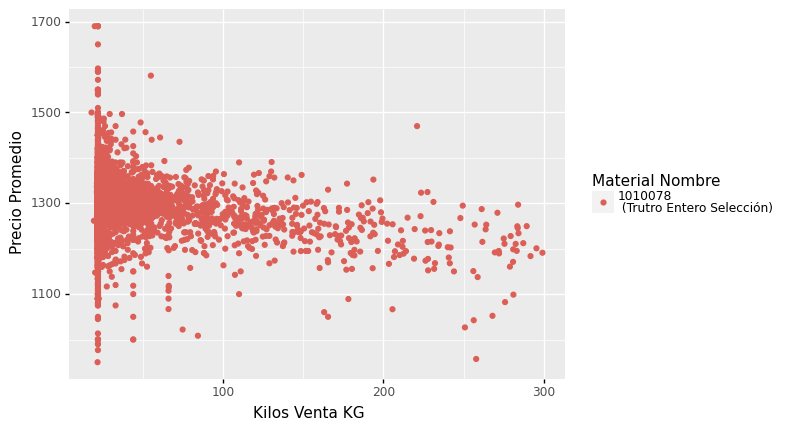

<ggplot: (89267591955)>

In [58]:
ggplot(
    df_X_group_kg
        ,aes(
            x='Kilos Venta KG',
            y= 'Precio Promedio',
            color='Material Nombre' ))\
    + geom_point()

###### Porcentaje de clientes que realizan una compra promedio INFERIOR a X <=300

In [79]:
df_group_kg = (
    df\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]\
.groupby(['Tipo de cliente', 'Material Nombre','Cliente']
                      ).mean().reset_index())

Client_Totales_Mat= df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
            &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
            #&(df_group_kg['Material Nombre']==')
           ].shape
      
print('Total de clientes',Client_Totales_Mat)
    
X_kg=300
df_X_group_kg=df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
            &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
            &(df_group_kg['Kilos Venta KG']<=X_kg)
           ]
print(df_X_group_kg.shape)
print('Porcentaje de clientes fuera',(df_X_group_kg.shape[0] / Client_Totales_Mat[0])*100,'%')
df_X_group_kg.describe()
#(include='all')

Total de clientes (5073, 5)
(4937, 5)
Porcentaje de clientes fuera 97.31914054799921 %


Kilos Venta KG  Precio Promedio
count     4937.000000      4937.000000
mean        38.058634      1292.012802
std         39.104788        70.256337
min         18.000000       950.000000
25%         22.000000      1250.436364
50%         22.000000      1296.085714
75%         31.862069      1334.978947
max        299.184028      1690.000000

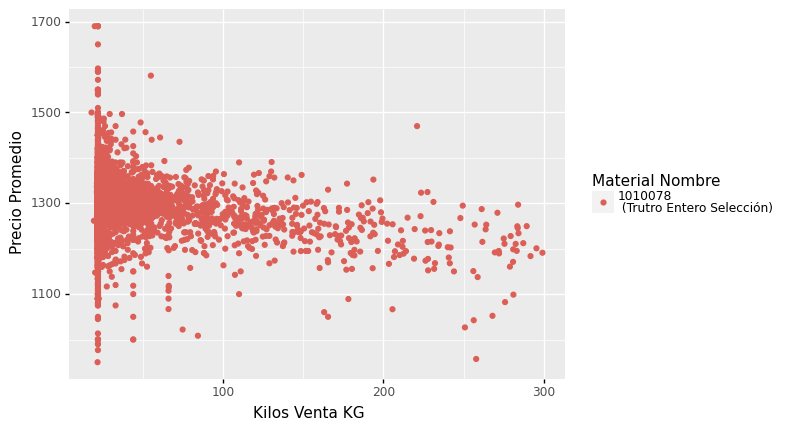

<ggplot: (89267379941)>

In [80]:
ggplot(
    df_X_group_kg
        ,aes(
            x='Kilos Venta KG',
            y= 'Precio Promedio',
            color='Material Nombre' ))\
    + geom_point()

###### Codigo Graficas Todos los canales Kg promedio

In [28]:
#[df.Año>2020]\
df_group_kg=df\
.groupby(['Tipo de cliente', 'Material Nombre','Cliente']
                      ).mean().reset_index()\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]
df_group_kg.head()

Cliente                    Material Nombre Tipo de cliente  \
0  10031085  1010002\n (Con Menudencia >2.130)     Foodservice   
1  10083379  1010002\n (Con Menudencia >2.130)     Foodservice   
2  10127654  1010002\n (Con Menudencia >2.130)     Foodservice   
3  10510981  1010002\n (Con Menudencia >2.130)     Foodservice   
4  10571591  1010002\n (Con Menudencia >2.130)     Foodservice   

   Kilos Venta KG  Precio Promedio  
0            18.0           1300.0  
1           175.0           1325.0  
2            97.0           1575.0  
3            18.0           1800.0  
4           144.0           1950.0

In [29]:
#=====================================================
#  Grafica que contiene el zoom realizado a los datos,
#  descartando  los  clientes  con promedios más altos
#=====================================================

X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'
gglist_Box_KG=[]

#=================================
# Sin filtro
#=================================
gglist_Box_KG.append(ggplot(
    df_group_kg
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     #+ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
 +ggtitle('Distribución consumo promedio de los clientes.')
 
 +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
#=================================
# Filtrado de 2 Ton
#=================================
gglist_Box_KG.append(ggplot(
    df_group_kg[df_group_kg[y_G] <= 2*10**3
               ]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     #+ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
    +ggtitle('Distribución consumo promedio de los clientes.')

    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)


###### Codigo Grafica  Foodservices y Tradicional  Kg promedio

In [30]:
    df_group_kg[#(df_group_kg[y_G] <= 3*10**2)&
                ((df_group_kg[Color_G]=='Tradicional')|
                (df_group_kg[Color_G]=='Foodservice'))
               ].describe()

Kilos Venta KG  Precio Promedio
count    34415.000000     34415.000000
mean        55.153688      1803.761598
std        146.023147       677.021134
min          4.000000       375.000000
25%         21.363636      1310.384615
50%         22.666667      1573.333333
75%         40.333333      2246.104701
max       6981.666667      7000.000000

array([[<AxesSubplot:title={'center':'Kilos Venta KG'}>,
        <AxesSubplot:title={'center':'Precio Promedio'}>]], dtype=object)

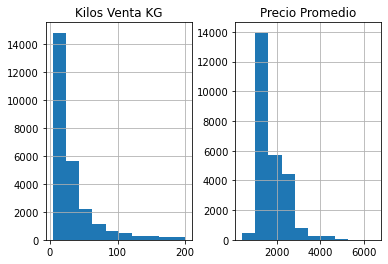

In [31]:
    df_group_kg[(df_group_kg[y_G] <= 2*10**2)&
                ((df_group_kg[Color_G]=='Tradicional')
                # |(df_group_kg[Color_G]=='Foodservice')
                )
               ].hist()

In [32]:
#=====================================================
#  Grafica que contiene el zoom realizado a los datos,
#  descartando  los  clientes  con promedios más altos
#=====================================================

X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'
gglist_Box_KG_F_T=[]

#=================================
# Sin filtro
#=================================
gglist_Box_KG_F_T.append(ggplot(
    df_group_kg[
        (df_group_kg[Color_G]=='Tradicional')|
        (df_group_kg[Color_G]=='Foodservice')
    ]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     #+ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
 +ggtitle('Distribución consumo promedio de los clientes.')
 
 +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
#=================================
# Filtrado de 2 Ton
#=================================
gglist_Box_KG_F_T.append(ggplot(
    df_group_kg[(df_group_kg[y_G] <= 3*10**2)&
                ((df_group_kg[Color_G]=='Tradicional')|
                (df_group_kg[Color_G]=='Foodservice'))
               ]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     #+ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
    +ggtitle('Distribución consumo promedio de los clientes.')

    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)


##### Grafico 
Grafico General
> Posee la informacion de todos los Canales

Gráffico Especifico
> Solo Canal TRadicional y Foodservices

Se contruyo, una muestra con volumenes en promedio que solicita cada cliente y su respectivo precio promedio para cada producto, de esta forma evaluar como distribuyen los clientes de los diversos canales de venta.

Debido a las grandes diferencia de escala que poseen los clientes estudiados, se procedio a construir un segúndo grafico dejando fuera a los clientes con un consumo promedio sobre la tonelada por producto.

###### Grafica General

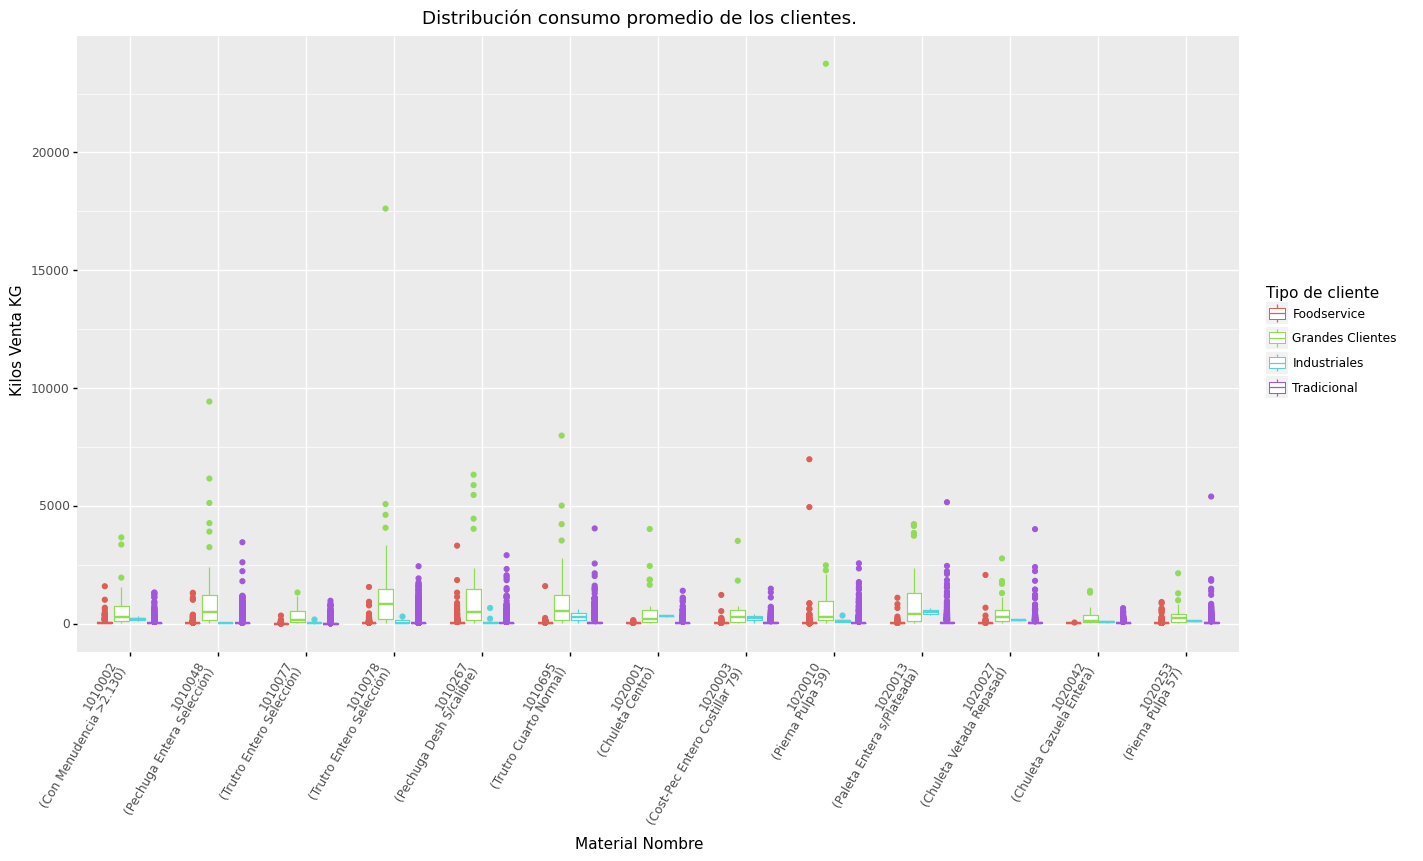

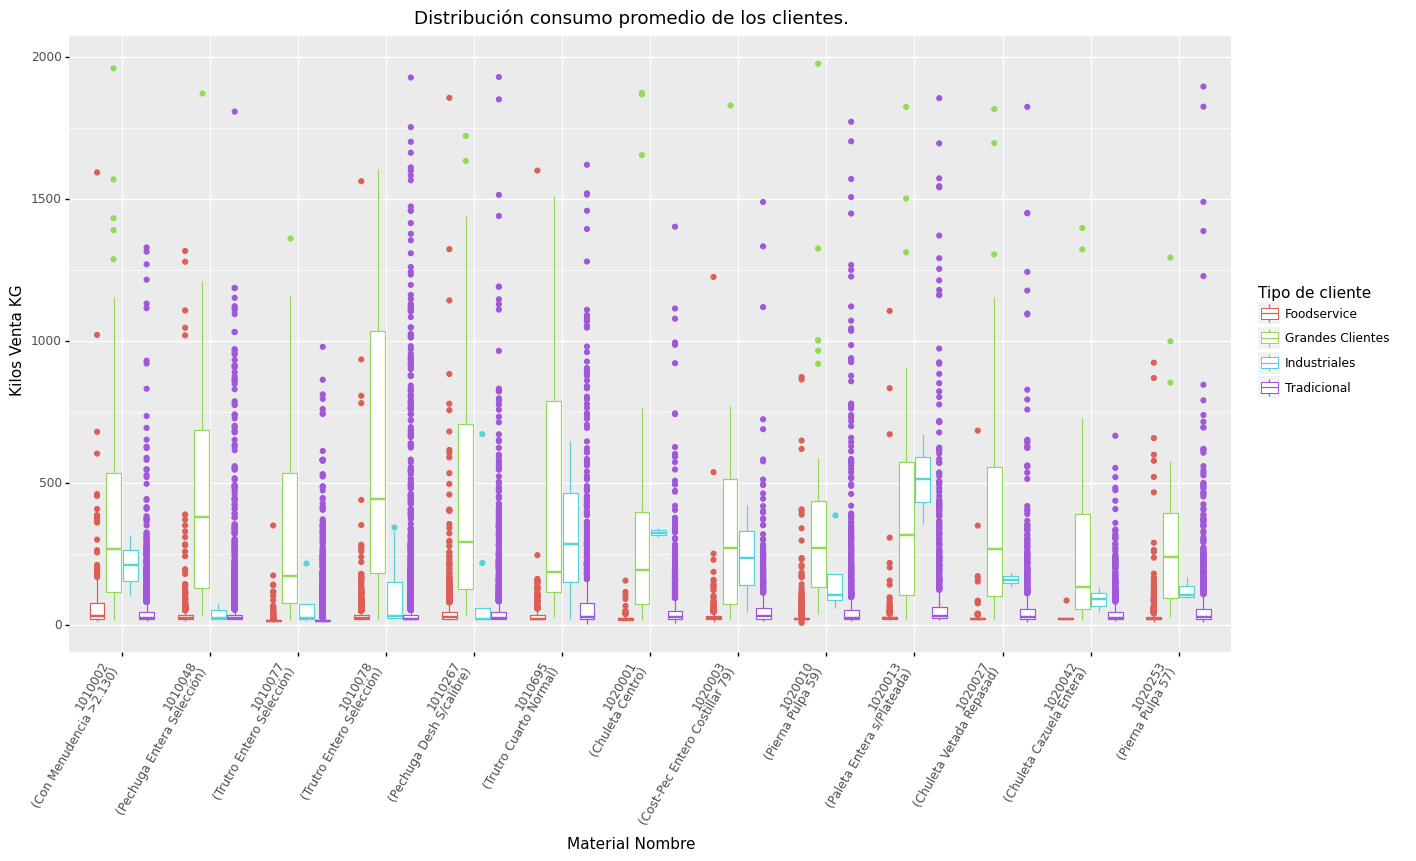

[<ggplot: (89275532493)>, <ggplot: (89275518109)>]

In [33]:
gglist_Box_KG

Se vizualiza que existen clientes,q ue cumplen los requisitos y se comportan como mayoristas en el proemdio de sus facturaciones. Esto representa que de los pedidos que realizan sosilican gran volumne de un mismo producto. 

El ultimo grafico nos muestra como los clientes del canal \textit{Grandes Clientes} compran en volumnes mayores a los otros clientes. Pese a que son clientes de volumen y periocidad mayor, este canal es menos influeyente en lo que respecta a volumen en contraste al canal Tradicional.


El comportamiento de compra promedio de los clientes del canal Tradicional, se explica por el tipo de infraestructura y clientes que son, frecuentemente personas que posee un almacen de barrio u inclusive personas naturales que revenden los productos carnicos.

######  Grafica de Foodservices y Canal Tradiconal 

Se acota el siguiente gráfico a los clientes del Canal Tradicional y FoodServices limitándose a clientes que realizan un compra en promedio inferior a 300 KG.
En lo que respecta a los clientes del Canal Tradicional, se descartaron a 136 clientes el 2.68/% de los que pertenecen a dicho canal y compran el producto _1010078_. 
Estos clientes que fueron descartados para la grafica siguiente solicitan en promedio 791 kilogramos de trutro de pollo, de este grupo el que compradon con lotes promedio más altos es de 2.5 toneladas para el mismo producto.

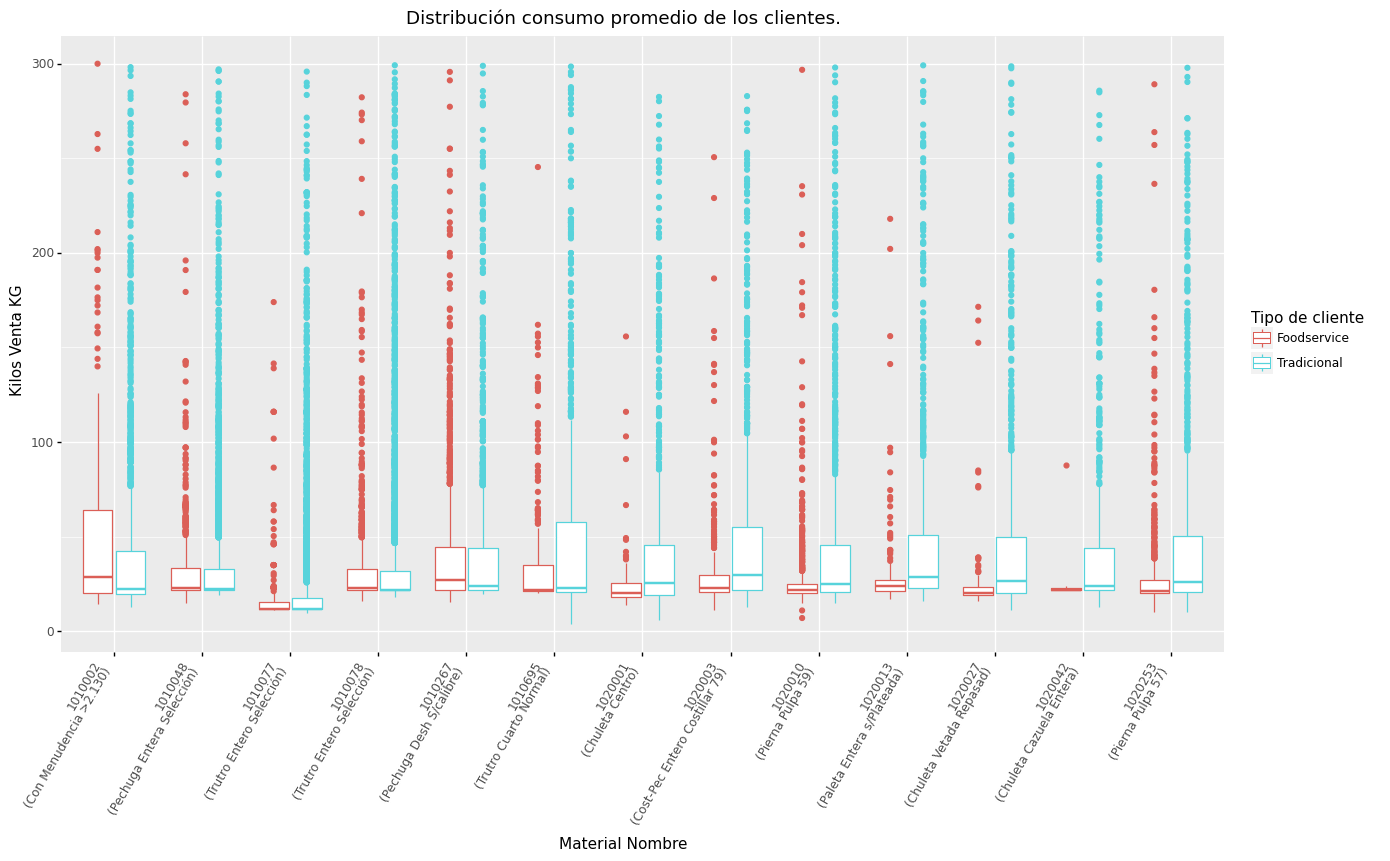

<ggplot: (89274991761)>

In [82]:
gglist_Box_KG_F_T[1]

Tomando en cuenta los 4.937 Clientes representados en el eje del producto 1010078 pertenecientes al Canal Tradicional, se aprecia que el cliente que compra el volumen más minimo en promedio es de 18 kg, cuyo valor es inferior a las cajas del producto que es de 23 Kg. Dado que un 50% de los clientes han realizado una compra promedio inferior a la caja del producto, no se tomará por el momento como datos sesgados las facturaciones inferiores a este volumen. 

Total de clientes (5073, 5)
(4937, 5)
Porcentaje de clientes fuera 97.31914054799921 %

In [88]:
df_group_kg['Material Nombre'].unique()

array(['1010002\n (Con Menudencia >2.130)',
       '1010048\n (Pechuga Entera Selección)',
       '1010077\n (Trutro Entero Selección)',
       '1010078\n (Trutro Entero Selección)',
       '1010267\n (Pechuga Desh S/calibre)',
       '1010695\n (Trutro Cuarto Normal)', '1020001\n (Chuleta Centro)',
       '1020003\n (Cost-Pec Entero Costillar 79)',
       '1020010\n (Pierna Pulpa 59)',
       '1020013\n (Paleta Entera s/Plateada)',
       '1020027\n (Chuleta Vetada Repasad)',
       '1020042\n (Chuleta Cazuela Entera)',
       '1020253\n (Pierna Pulpa 57)'], dtype=object)

In [90]:
df_group_kg[(df_group_kg['Tipo de cliente']=='Tradicional')
            &(df_group_kg['Material Nombre']=='1010078\n (Trutro Entero Selección)')
            ].describe()

Kilos Venta KG  Precio Promedio
count     5073.000000      5073.000000
mean        58.245271      1286.865792
std        143.578165        77.161419
min         18.000000       800.000000
25%         22.000000      1248.461538
50%         22.066667      1293.938272
75%         34.200000      1333.684211
max       2443.104839      1690.000000

In [81]:
df_X_group_kg.describe()

Kilos Venta KG  Precio Promedio
count     4937.000000      4937.000000
mean        38.058634      1292.012802
std         39.104788        70.256337
min         18.000000       950.000000
25%         22.000000      1250.436364
50%         22.000000      1296.085714
75%         31.862069      1334.978947
max        299.184028      1690.000000

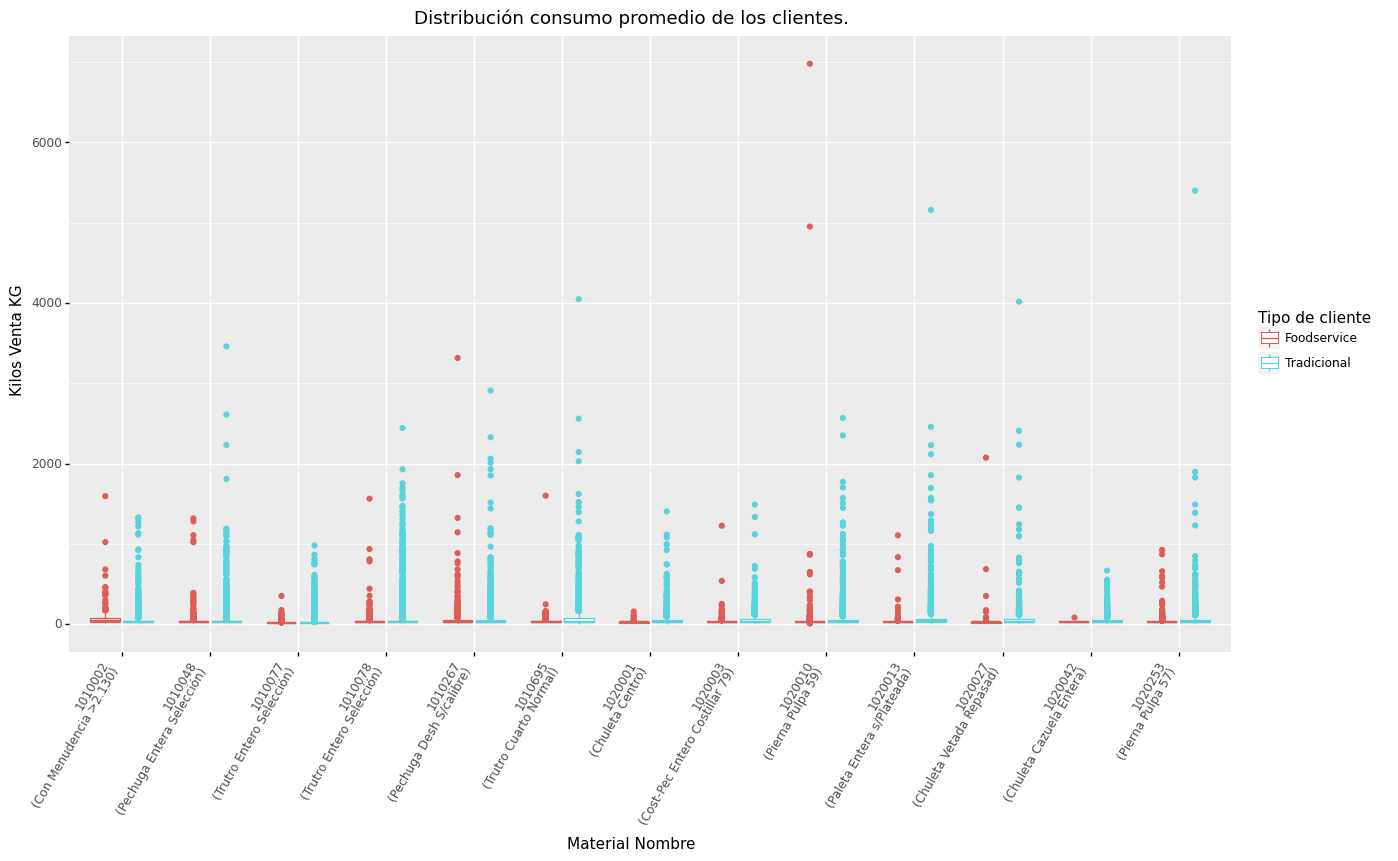

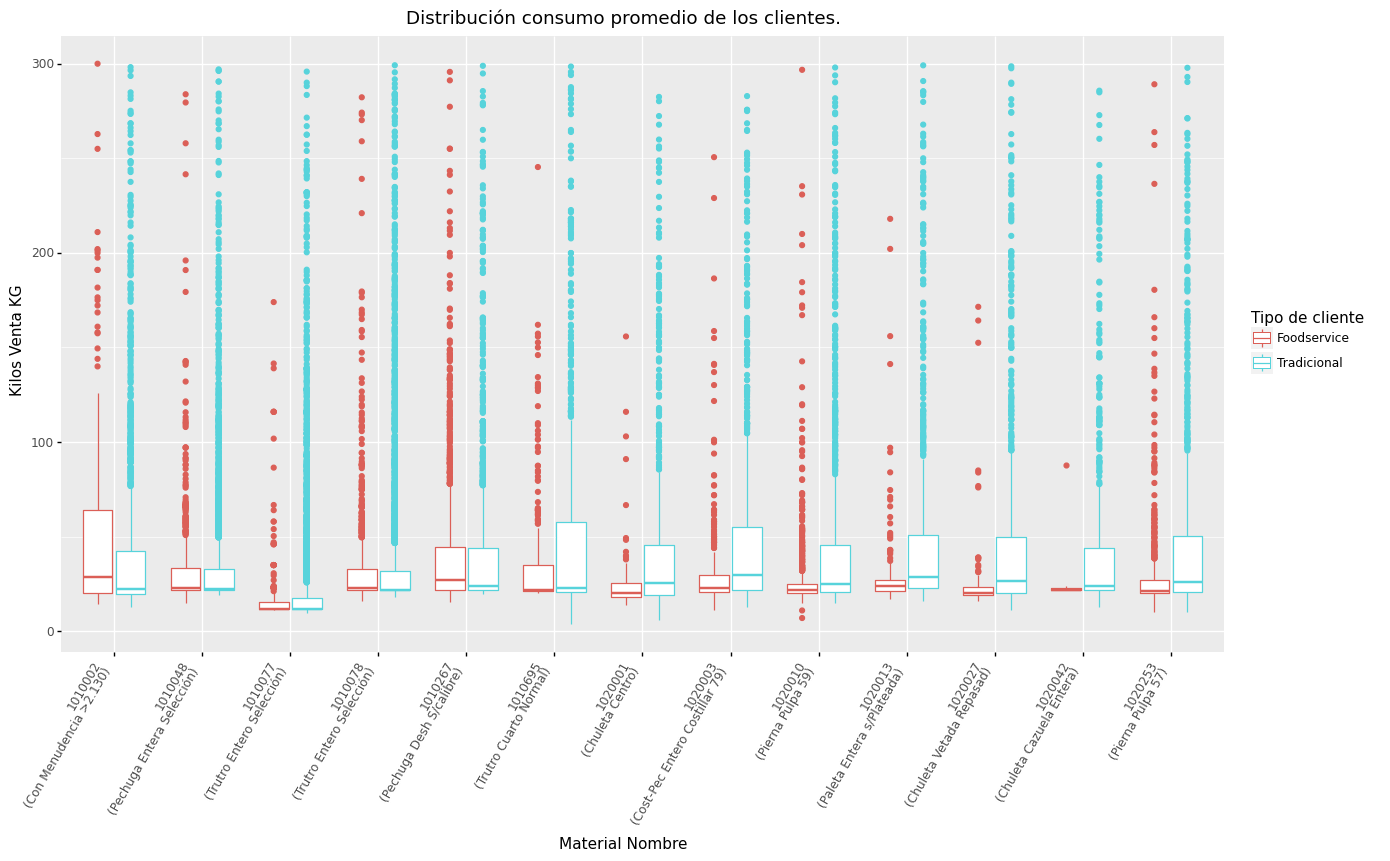

[<ggplot: (89275016409)>, <ggplot: (89274991761)>]

In [77]:
gglist_Box_KG_F_T

#### PDF

In [29]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
        gglist_Box_KG
                  ,file_direct_Graphic
    +'/Generales/Boxplot'+"/Boxplot KG mean Client Prod .pdf")
time_convert(time.time()-start_time)

C:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/rolft/Documents/Repositorios/Graficos/Generales/Boxplot/Boxplot KG mean Client Prod .pdf


Time Lapsed = 0:0:13.069550275802612 
 H:m:s


In [78]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
        gglist_Box_KG_F_T
                  ,file_direct_Graphic
    +'/Generales/Boxplot'+"/Boxplot_KG_mean_Trad_Food_Prod.pdf")
time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Boxplot/Boxplot_KG_mean_Trad_Food_Prod.pdf


Time Lapsed = 0:0:5.5532753467559814 
 H:m:s


### Precio 

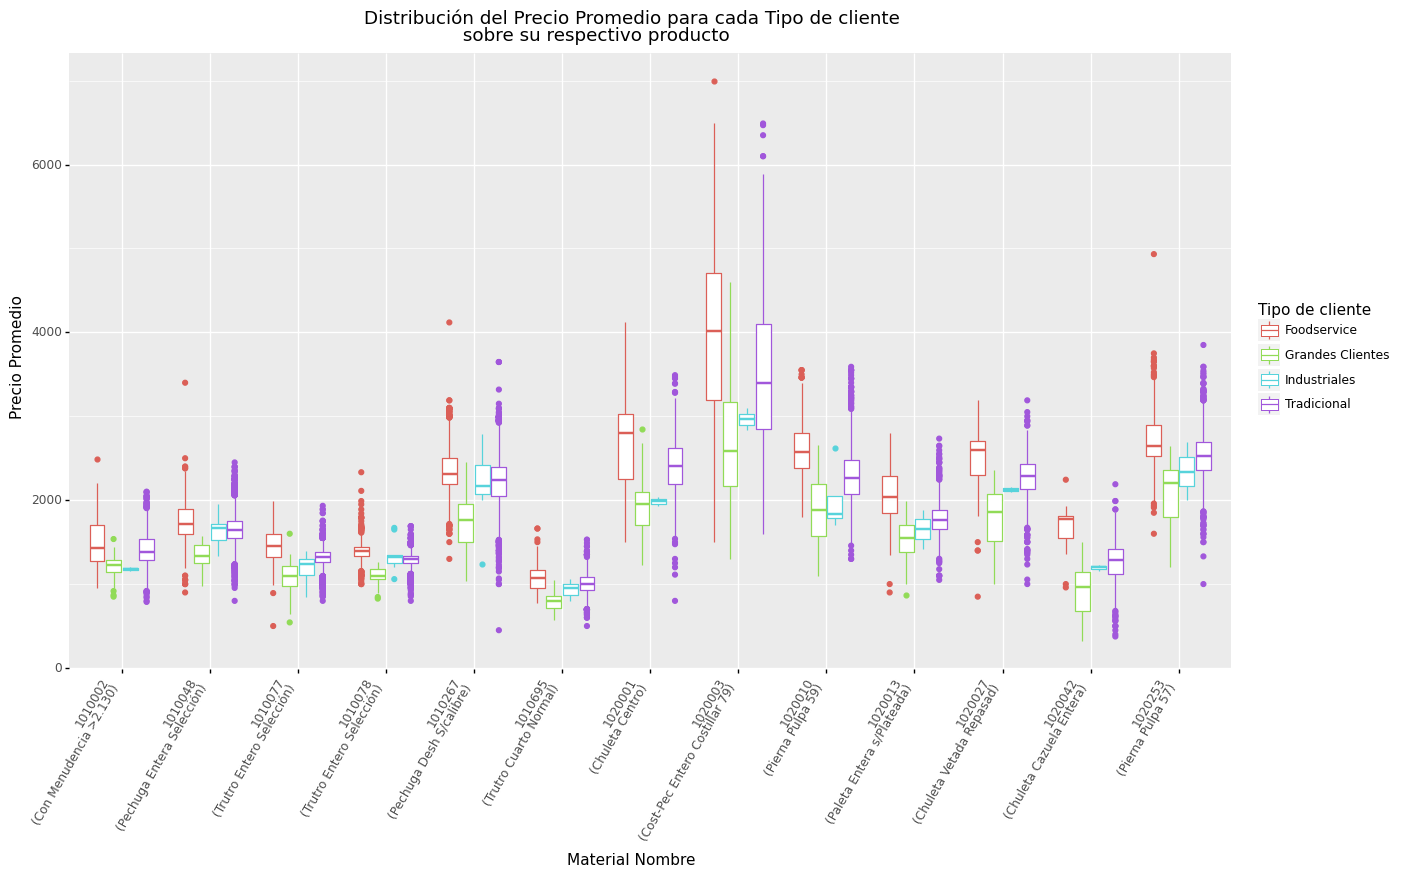

<ggplot: (189752314736)>

In [46]:
X_G='Material Nombre'
y_G='Precio Promedio'
Color_G='Tipo de cliente'
(ggplot(
    df_group_kg
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto\
             ')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)


### Canal / Año

In [53]:
df_group_kg=df[['Cliente','Material Nombre','Tipo de cliente',  'Kilos Venta KG','Año' ,'Precio Promedio'
  ]].groupby(['Año','Tipo de cliente', 'Material Nombre','Cliente']).mean().reset_index()
df_group_kg.Año=df_group_kg.Año.astype('category')
df_group_kg.head()

Año Tipo de cliente                    Material Nombre   Cliente  \
0  2018     Foodservice  1010002\n (Con Menudencia >2.130)  12122226   
1  2018     Foodservice  1010002\n (Con Menudencia >2.130)  14165940   
2  2018     Foodservice  1010002\n (Con Menudencia >2.130)  14450952   
3  2018     Foodservice  1010002\n (Con Menudencia >2.130)  14625675   
4  2018     Foodservice  1010002\n (Con Menudencia >2.130)  14629688   

   Kilos Venta KG  Precio Promedio  
0       19.000000      1200.000000  
1       24.571429      1357.142857  
2       16.000000      1200.000000  
3       78.636364      1222.727273  
4       22.457143      1238.571429

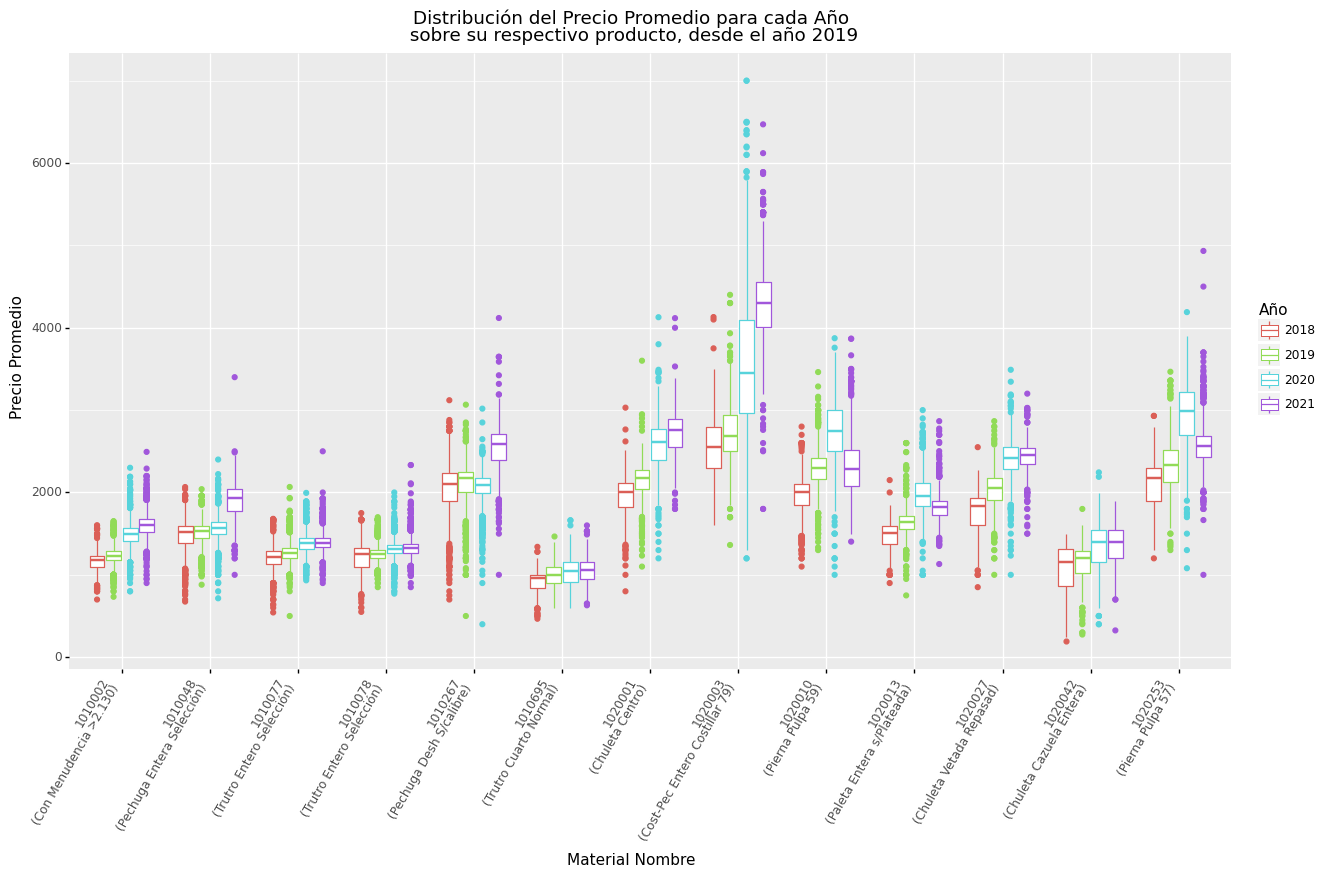

<ggplot: (189716652370)>

In [54]:
X_G='Material Nombre'
y_G='Kilos Venta KG'
y_G='Precio Promedio'
Color_G='Año'#'Tipo de cliente'
(ggplot(
    df_group_kg
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2019')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)


Se visualiza que dentro de los clientes, existen algunos que emiten en proemdio, facuras por grandes volumnes de venta

## Box plot Precio Promedio de las transacciónes
Actualmente se tiene el precio de todas las transacciones, como segundo grafico.

Este se reeemplazará por un grafico que represente el precio promedio que paga cada cliente por un producto determinado.

Titulo: precio promedio del cliente.



##### Data

In [16]:
#'Material Nombre'
DF_Full.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Frecuencia Historica', 'Centro', 'Centro.1', 'Población',
       'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1',
       'Categoría Cliente', 'Zona de reparto', 'Año Creación',
       'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1',
       'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2',
       'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado',
       'Estandar', 'Envase', 'Material Nombre'],
      dtype='object')

In [17]:
df=DF_Full.copy()

In [26]:
df['Precio']=df['Precio Promedio']

#### Facturación 

##### Grafica Precio, Canal Producto

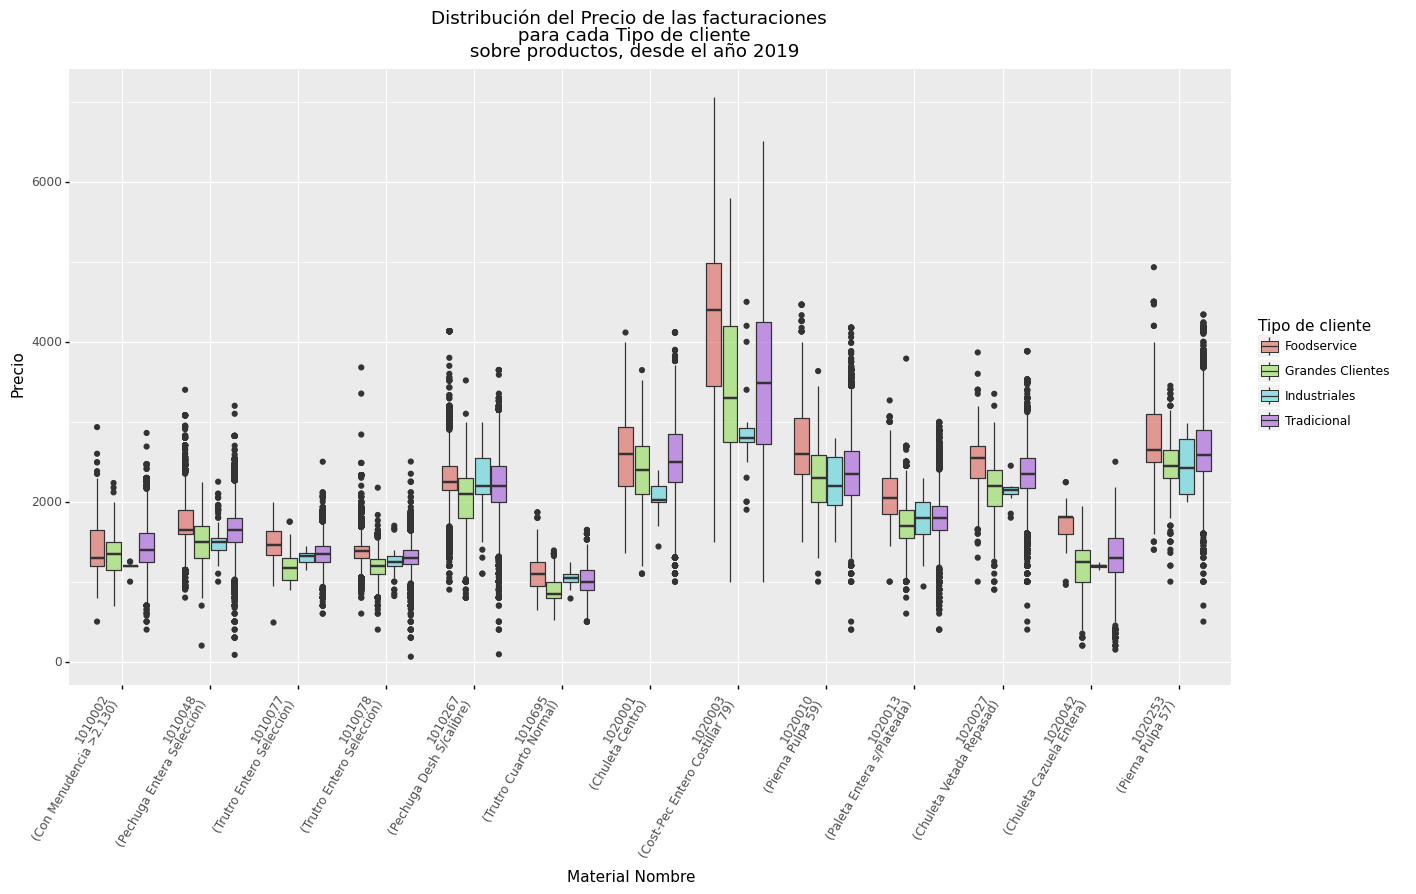

[<ggplot: (116679925541)>]

In [42]:
Box_plot=[]
X_G='Material Nombre'
y_G='Precio'
Color_G='Tipo de cliente'
Box_plot.append(ggplot(
    df[
        (df.Año>=2019)&(df[y_G]<10**4)
    ]
        ,aes(
            x=X_G,
            y= y_G ,
            fill=Color_G 
            ))\
    + geom_boxplot(alpha=0.6)
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' de las facturaciones \n para cada '+Color_G+
              '\n sobre productos, desde el año 2019')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot

##### Grafica Precio, Por Año

###### Grafico de prueba 

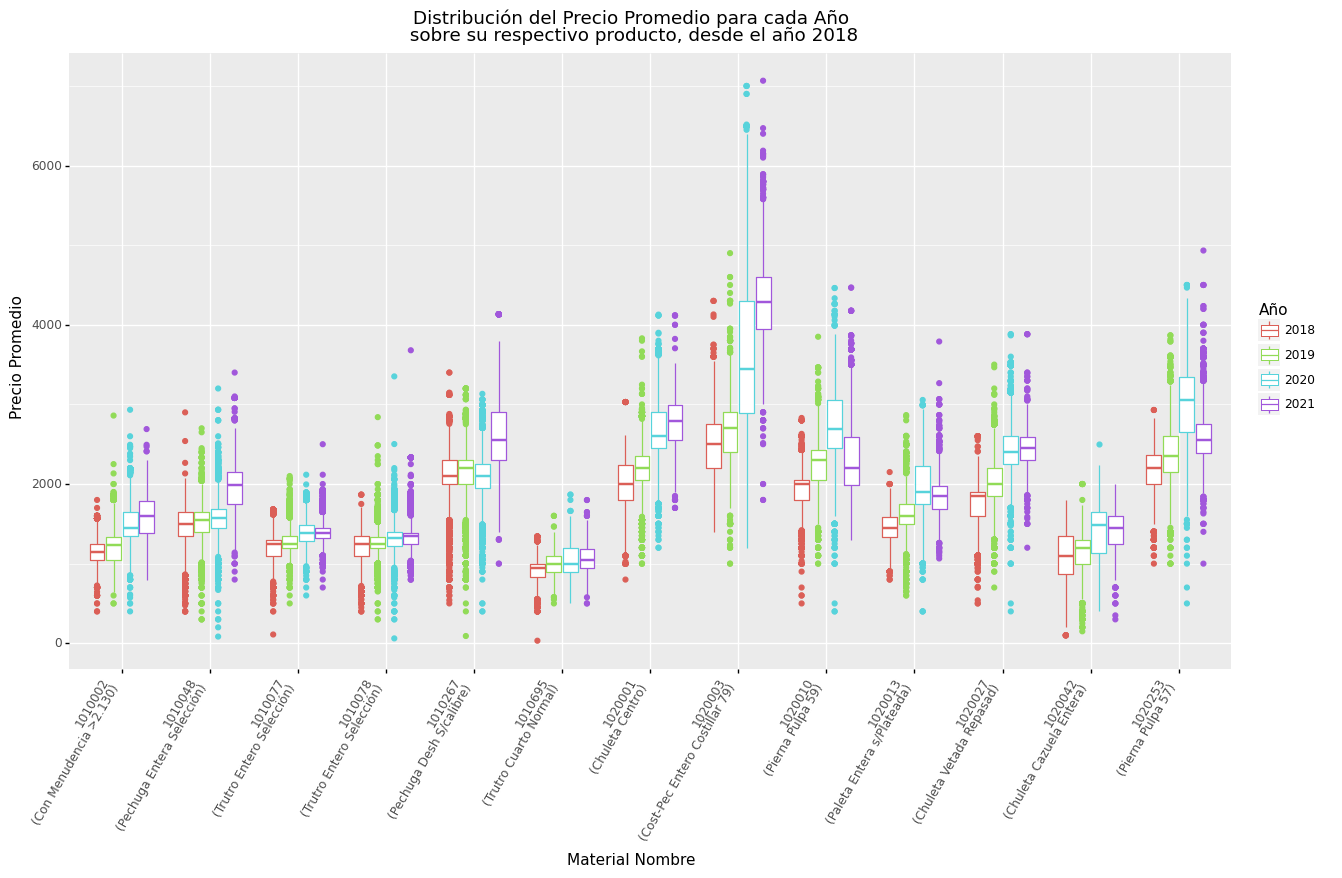

<ggplot: (116656107930)>

In [19]:
X_G='Material Nombre'
y_G='Precio'
Color_G='Año'
df_A=df.copy()
df_A.Año=df_A.Año.astype('category')
(ggplot(
    df_A[(df_A[y_G]<10**4)]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2018')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)

###### Grafico a utilizar


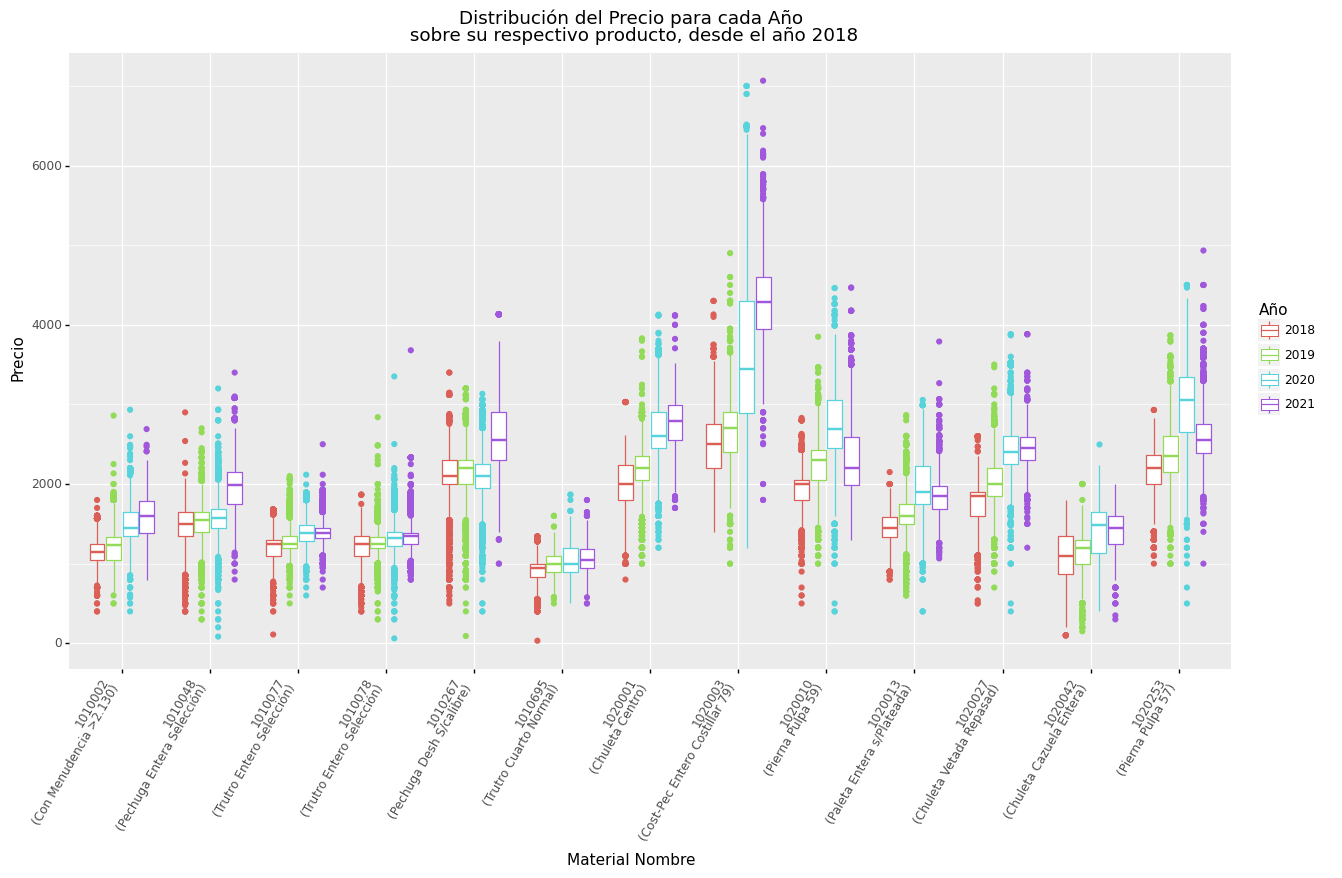

<ggplot: (116645659320)>

In [43]:
X_G='Material Nombre'
y_G='Precio'
Color_G='Año'
df_A=df.copy()
df_A.Año=df_A.Año.astype('category')
Box_plot.append(ggplot(
    df_A[(df_A[y_G]<10**4)]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2018')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot[1]

##### Grafica General 

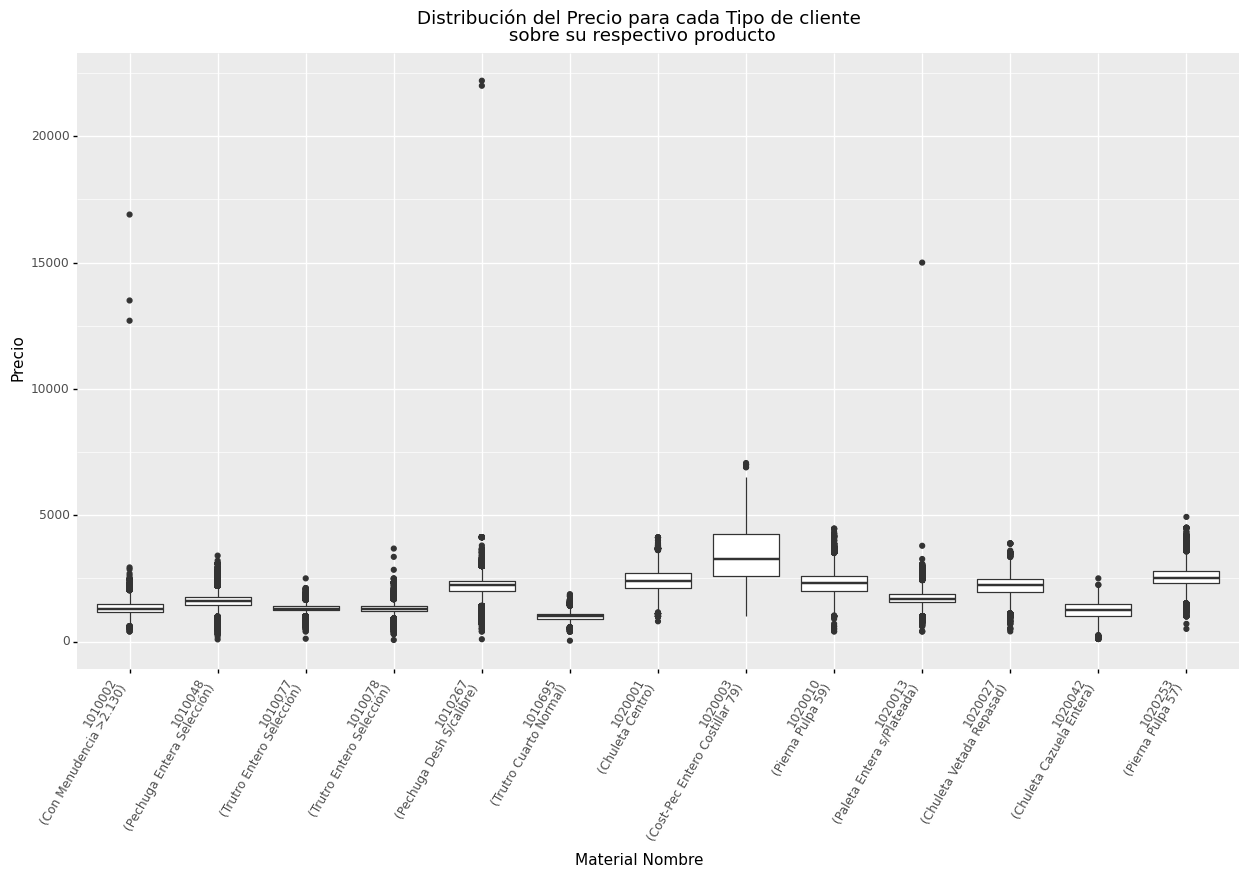

<ggplot: (116656555289)>

In [44]:
X_G='Material Nombre'
y_G='Precio'
Color_G='Tipo de cliente'
(ggplot(df
        ,aes(
            x=X_G,
            y= y_G ,))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

    +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))

)

#### Promedio

##### Precio  promedio del cliente.

###### data
Realiza un grouoby, cliente, producto, tipon de cliente

Se descarta el año para no tener un analisis erroneo

In [21]:
#[df.Año>2020]\
df_group_kg=df[df.Año>2019]\
.groupby(['Tipo de cliente', 'Material Nombre','Cliente']
                      ).mean().reset_index()\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio Promedio'
  ]]
df_group_kg.head()

Cliente                    Material Nombre Tipo de cliente  \
0  10031085  1010002\n (Con Menudencia >2.130)     Foodservice   
1  10083379  1010002\n (Con Menudencia >2.130)     Foodservice   
2  10127654  1010002\n (Con Menudencia >2.130)     Foodservice   
3  10510981  1010002\n (Con Menudencia >2.130)     Foodservice   
4  10571591  1010002\n (Con Menudencia >2.130)     Foodservice   

   Kilos Venta KG  Precio Promedio  
0            18.0           1300.0  
1           175.0           1325.0  
2            97.0           1575.0  
3            18.0           1800.0  
4           144.0           1950.0

###### Grafico Precio 

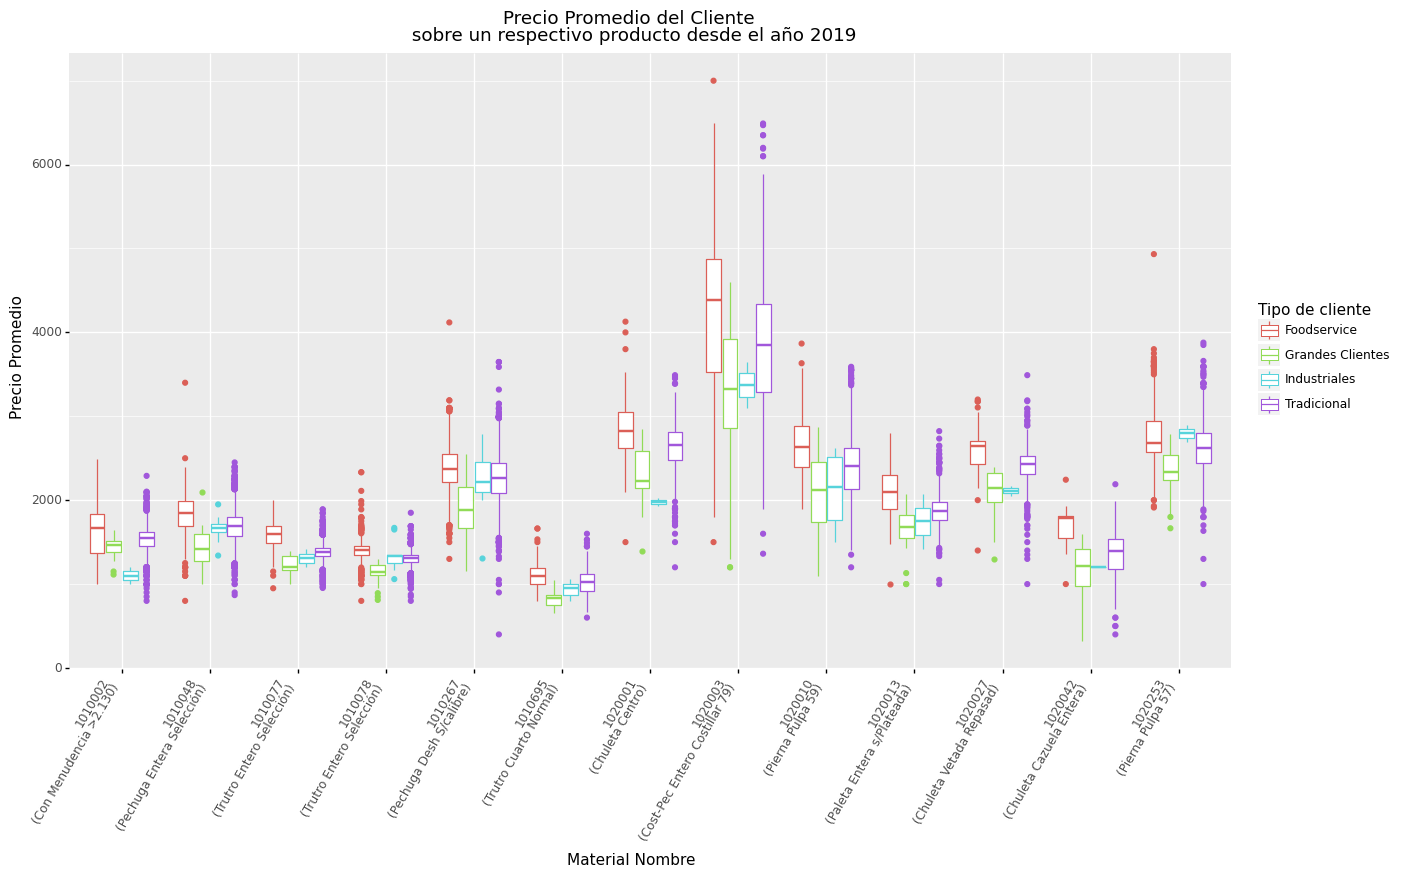

[<ggplot: (116694877431)>]

In [22]:
X_G='Material Nombre'
y_G='Precio Promedio'
Color_G='Tipo de cliente'

Prom_G=[(ggplot(
    df_group_kg
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

+ggtitle(y_G+' del Cliente \n sobre un respectivo producto desde el año 2019')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)]

Prom_G

#### PDF

In [46]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
        Box_plot+Prom_G
                  ,file_direct_Graphic+'/Generales/'+"Boxplot_Precio.pdf")
time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Boxplot_Precio.pdf


Time Lapsed = 0:0:24.01311445236206 
 H:m:s


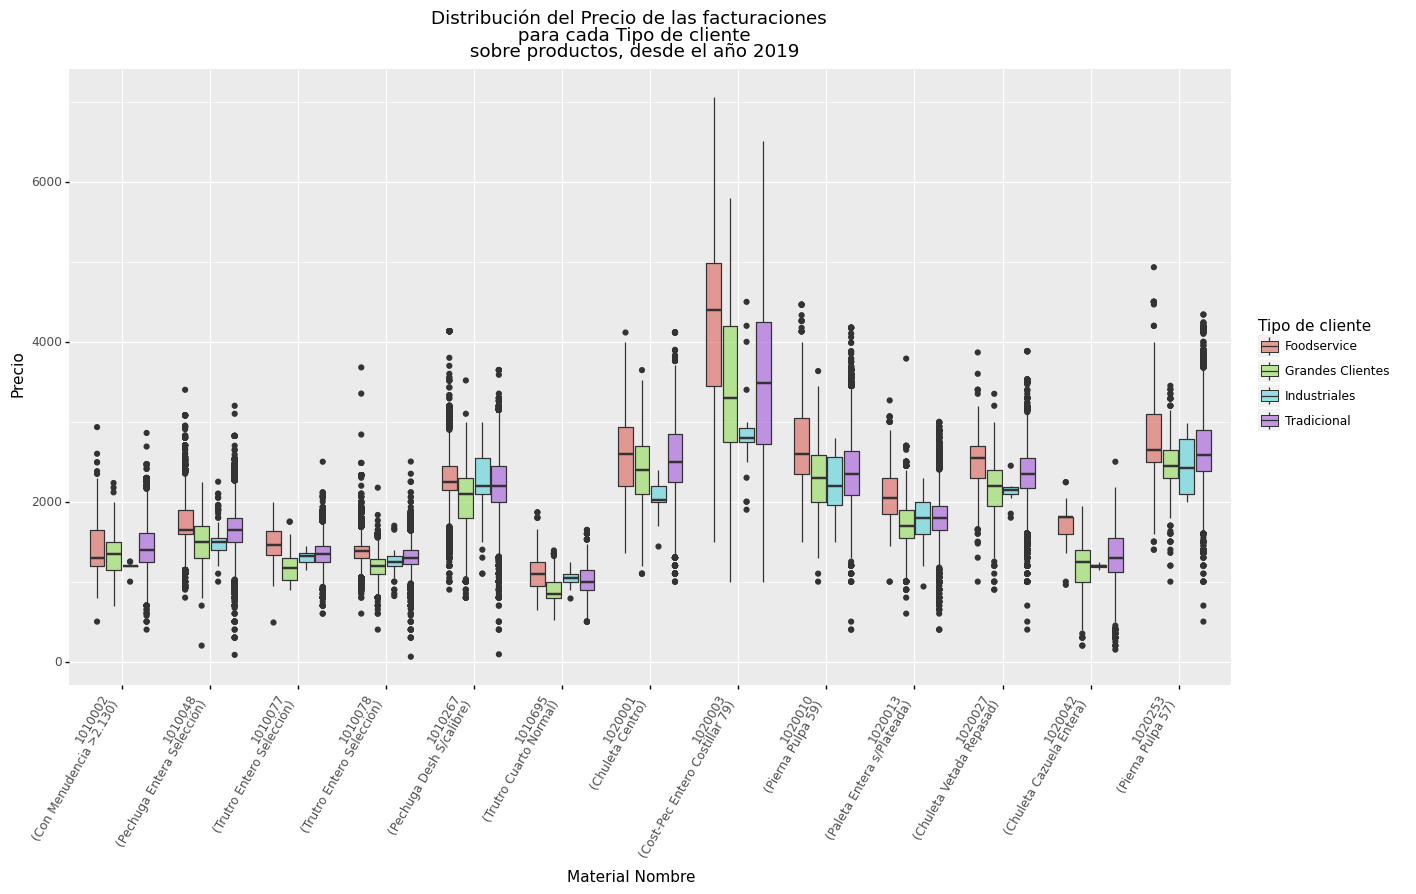

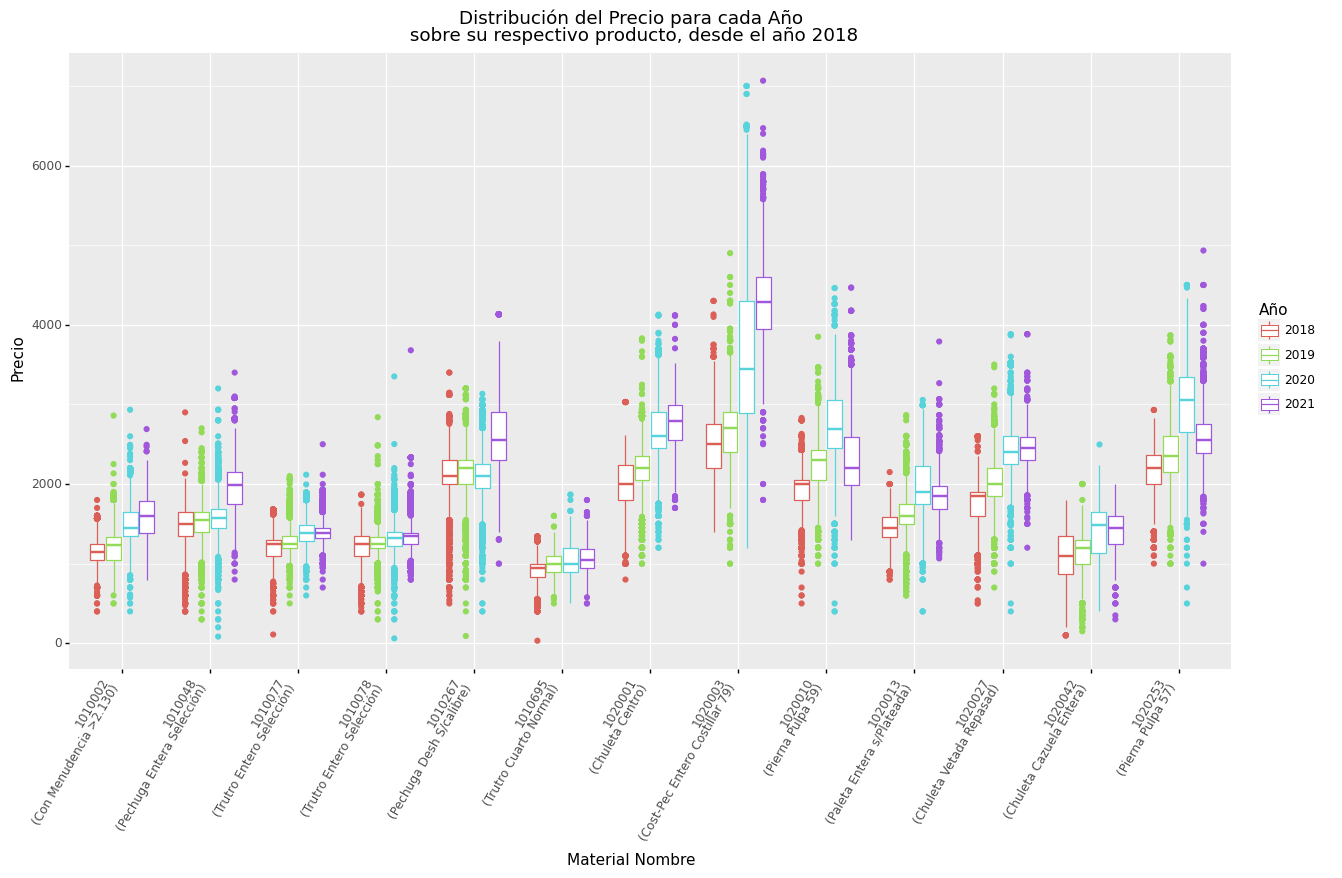

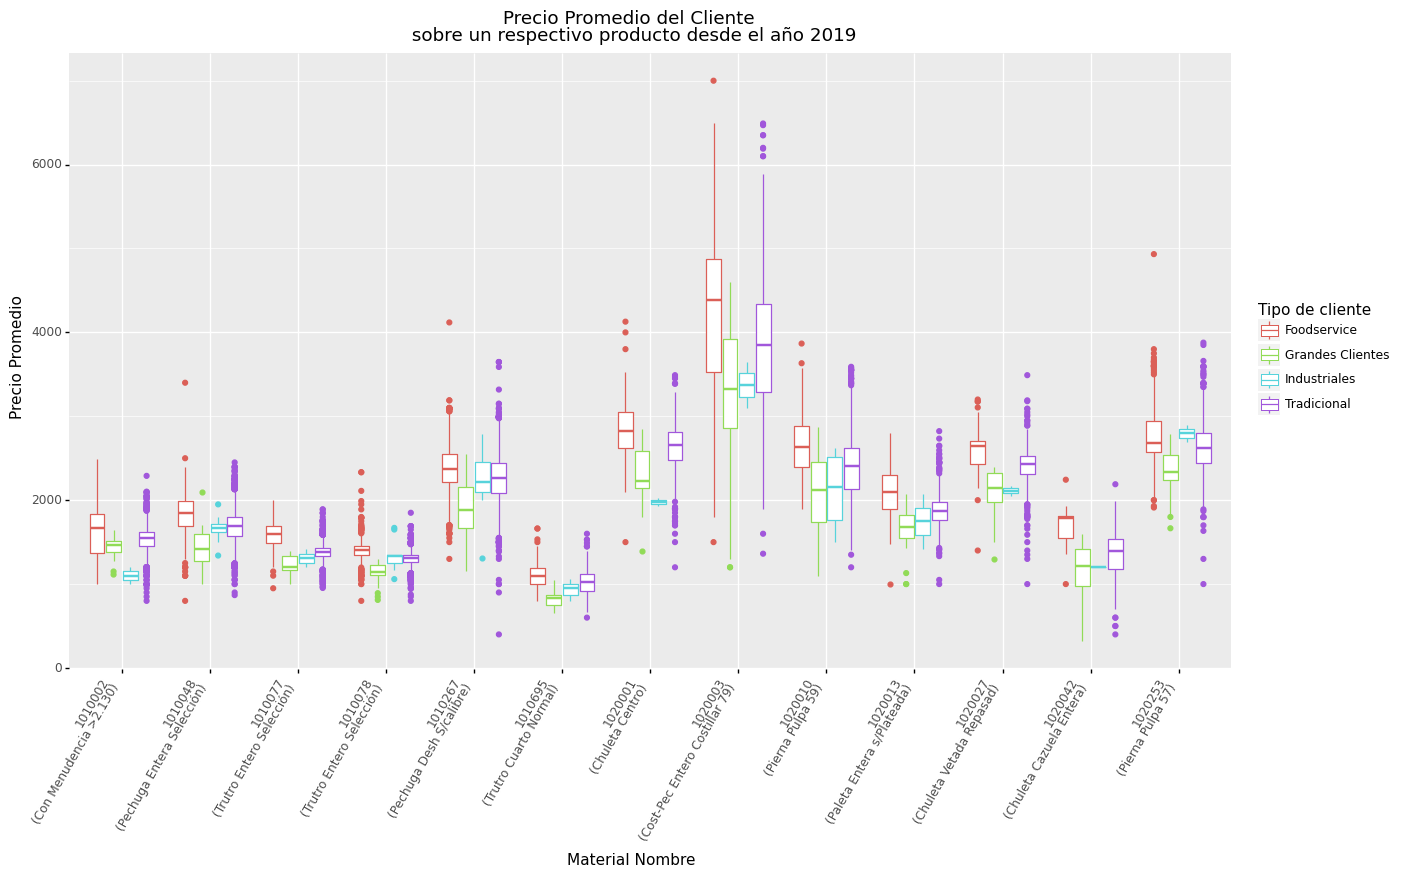

[<ggplot: (116679925541)>, <ggplot: (116645659320)>, <ggplot: (116694877431)>]

In [45]:
Box_plot+Prom_G

## Box plot Kilogramo de venta  de las transacciónes (KG)

#### Graficos 

##### Data

In [13]:
#'Material Nombre'
DF_Full.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Frecuencia Historica', 'Centro', 'Centro.1', 'Población',
       'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1',
       'Categoría Cliente', 'Zona de reparto', 'Año Creación',
       'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1',
       'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2',
       'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado',
       'Estandar', 'Envase', 'Material Nombre'],
      dtype='object')

In [14]:
df=DF_Full.copy()

##### Grafica KG, Canal Producto

'Precio'

In [27]:
df.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Frecuencia Historica', 'Centro', 'Centro.1', 'Población',
       'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1',
       'Categoría Cliente', 'Zona de reparto', 'Año Creación',
       'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1',
       'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2',
       'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado',
       'Estandar', 'Envase', 'Material Nombre', 'Precio'],
      dtype='object')

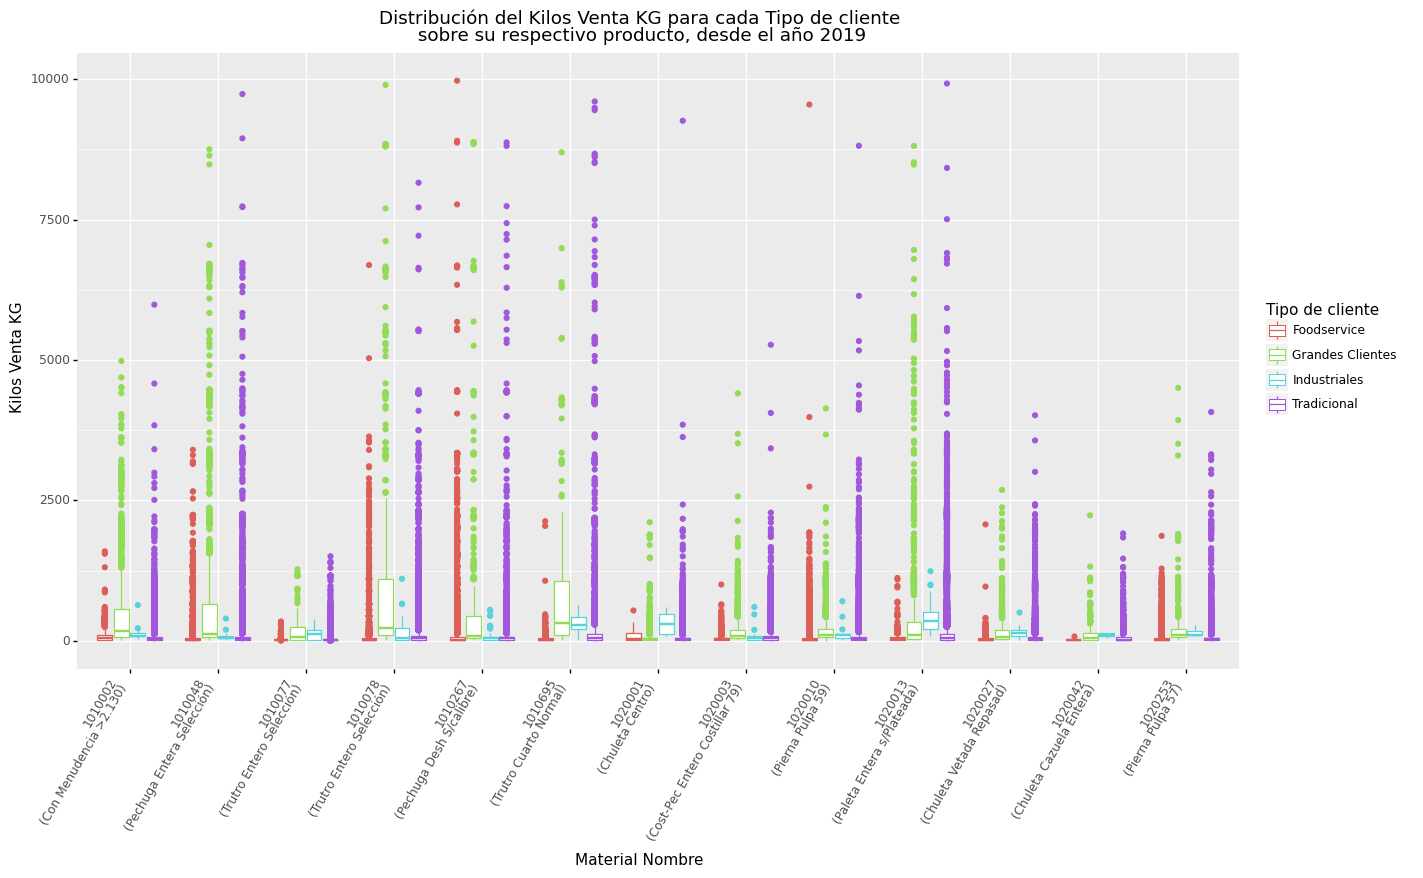

[<ggplot: (189753609725)>]

In [16]:
Box_plot_Venta=[]
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'
Box_plot_Venta.append(ggplot(
    df[
        (df.Año>=2019)&(df[y_G]<10**4)
    ]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2019')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot_Venta

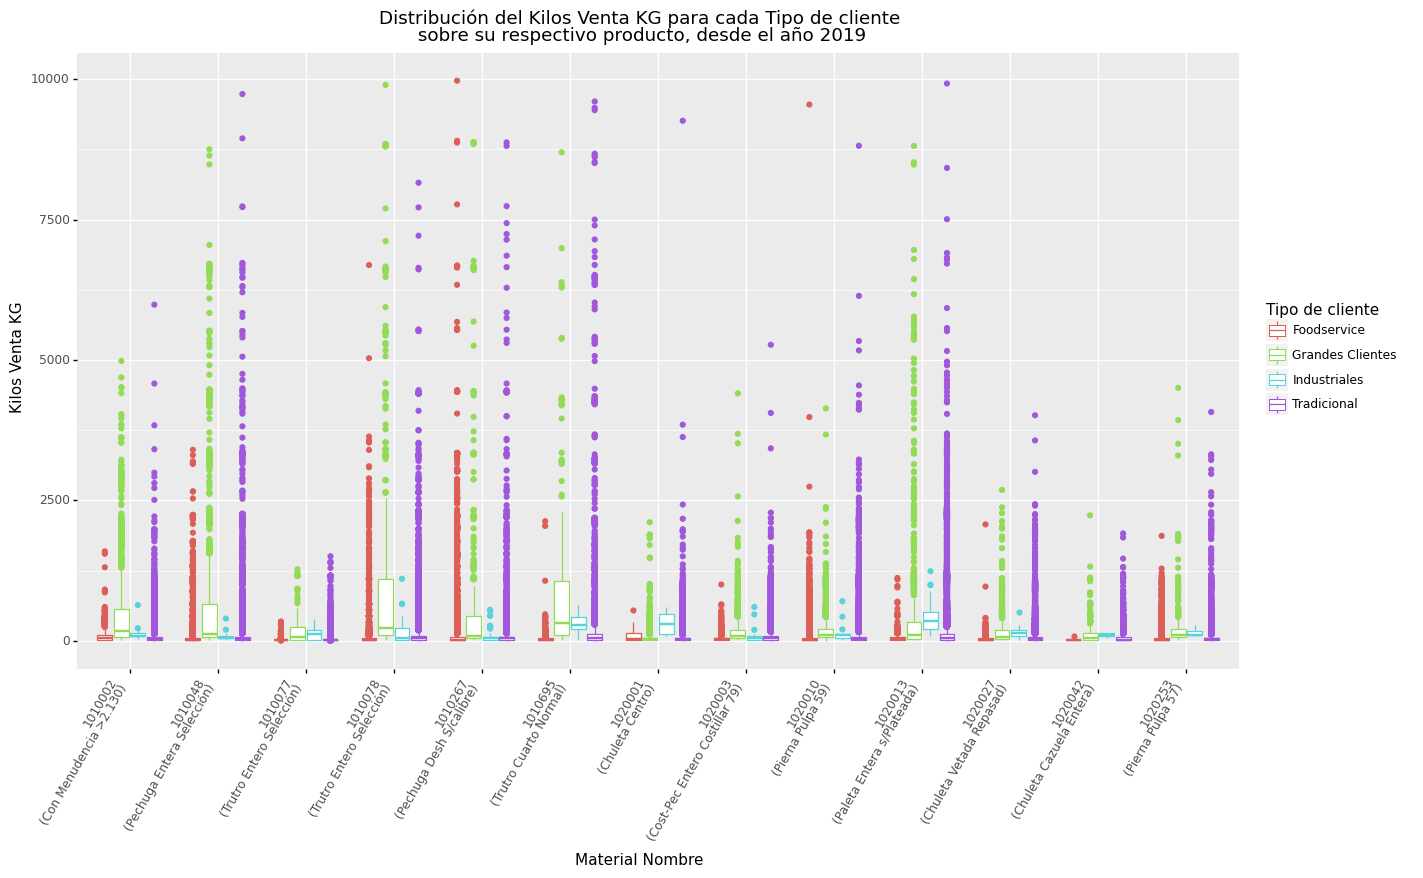

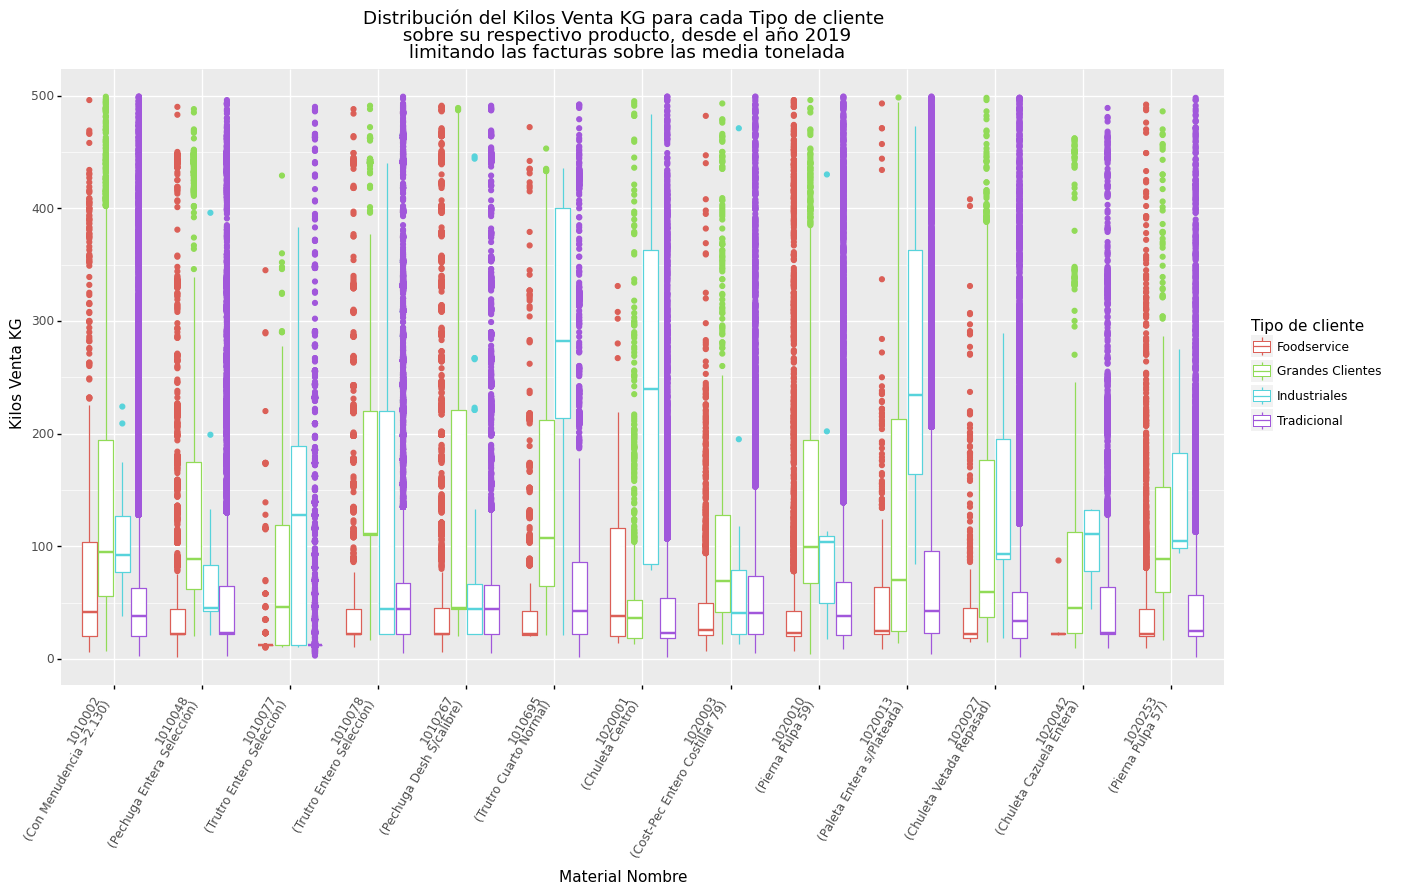

[<ggplot: (189753609725)>, <ggplot: (189717218774)>]

In [17]:
#Box_plot_Venta=[]
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'
Box_plot_Venta.append(ggplot(
    df[
        (df.Año>=2019)&(df[y_G]<0.5*10**3)
    ]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2019'
              +'\n limitando las facturas sobre las media tonelada'
             )
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot_Venta

##### Grafica Precio, Por Año

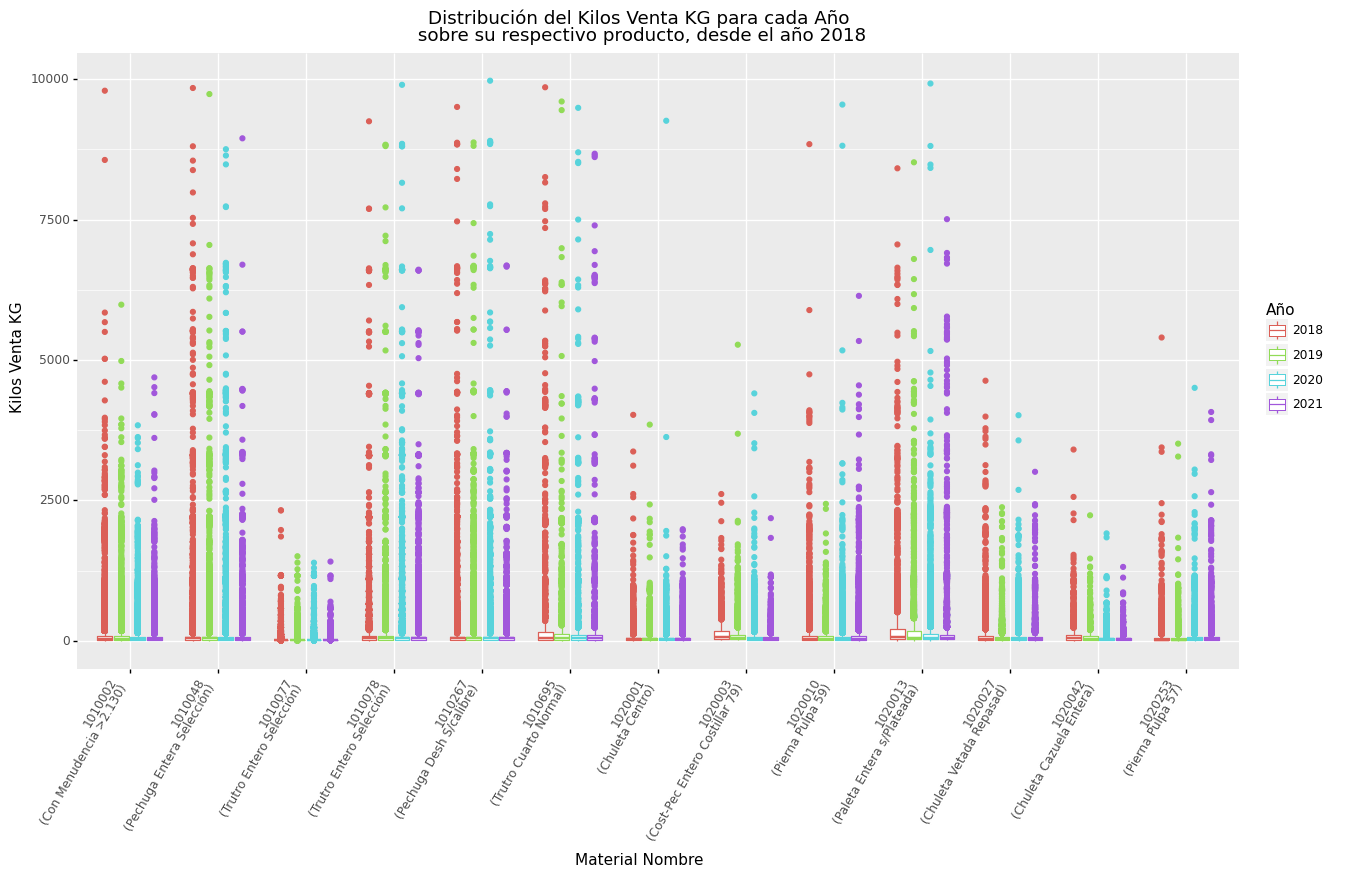

<ggplot: (189707392196)>

In [18]:
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Año'
df_A=df.copy()
df_A.Año=df_A.Año.astype('category')
Box_plot_Venta.append(ggplot(
    df_A[(df_A[y_G]<10**4)]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2018')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot_Venta[2]

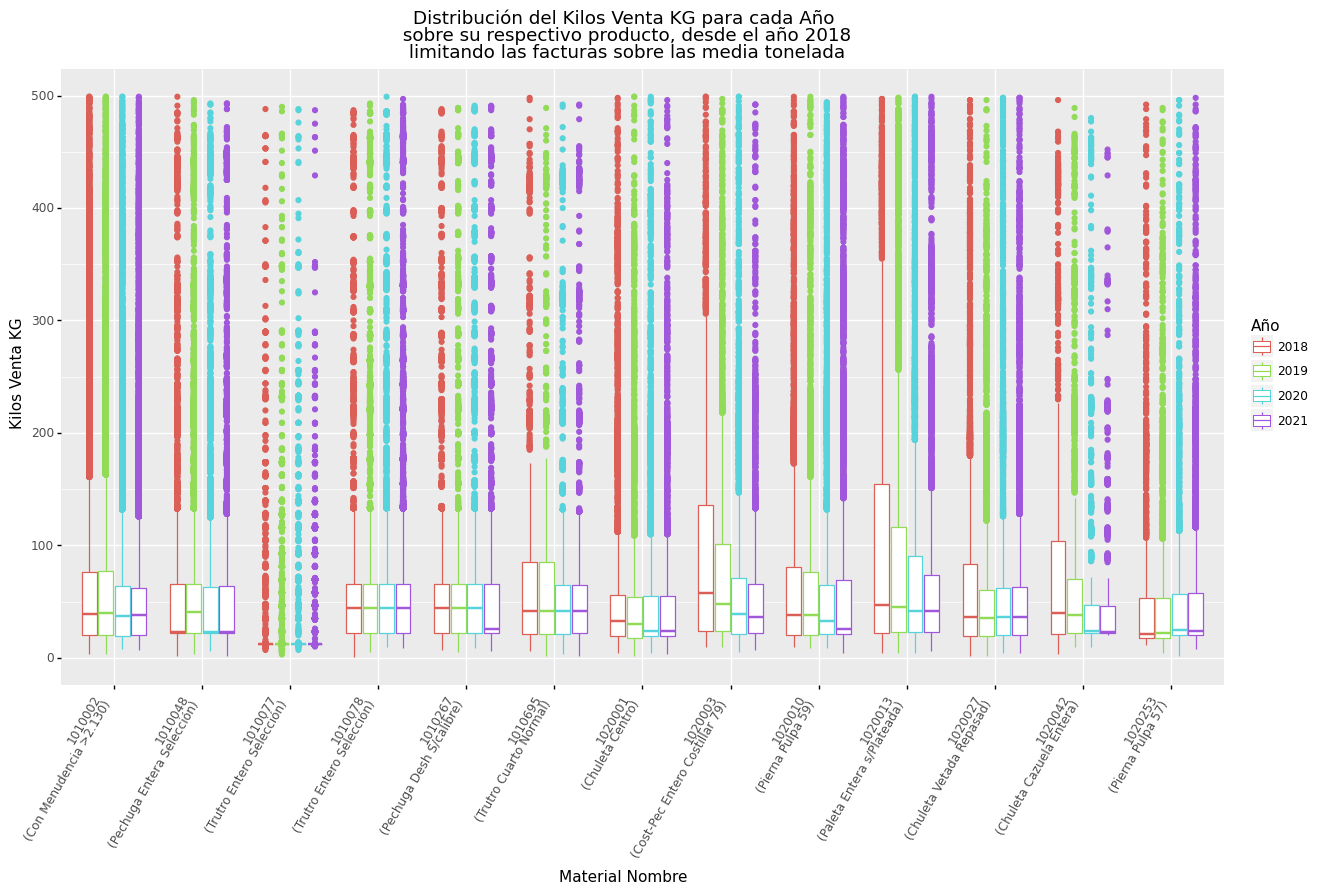

<ggplot: (189747532445)>

In [19]:
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Año'
df_A=df.copy()
df_A.Año=df_A.Año.astype('category')
Box_plot_Venta.append(ggplot(
    df_A[(df_A[y_G]<(0.5*10**3))]
        ,aes(
            x=X_G,
            y= y_G ,
            color=Color_G ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto, desde el año 2018'
             +'\n limitando las facturas sobre las media tonelada'
             )
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
)
Box_plot_Venta[3]

##### Grafica General 

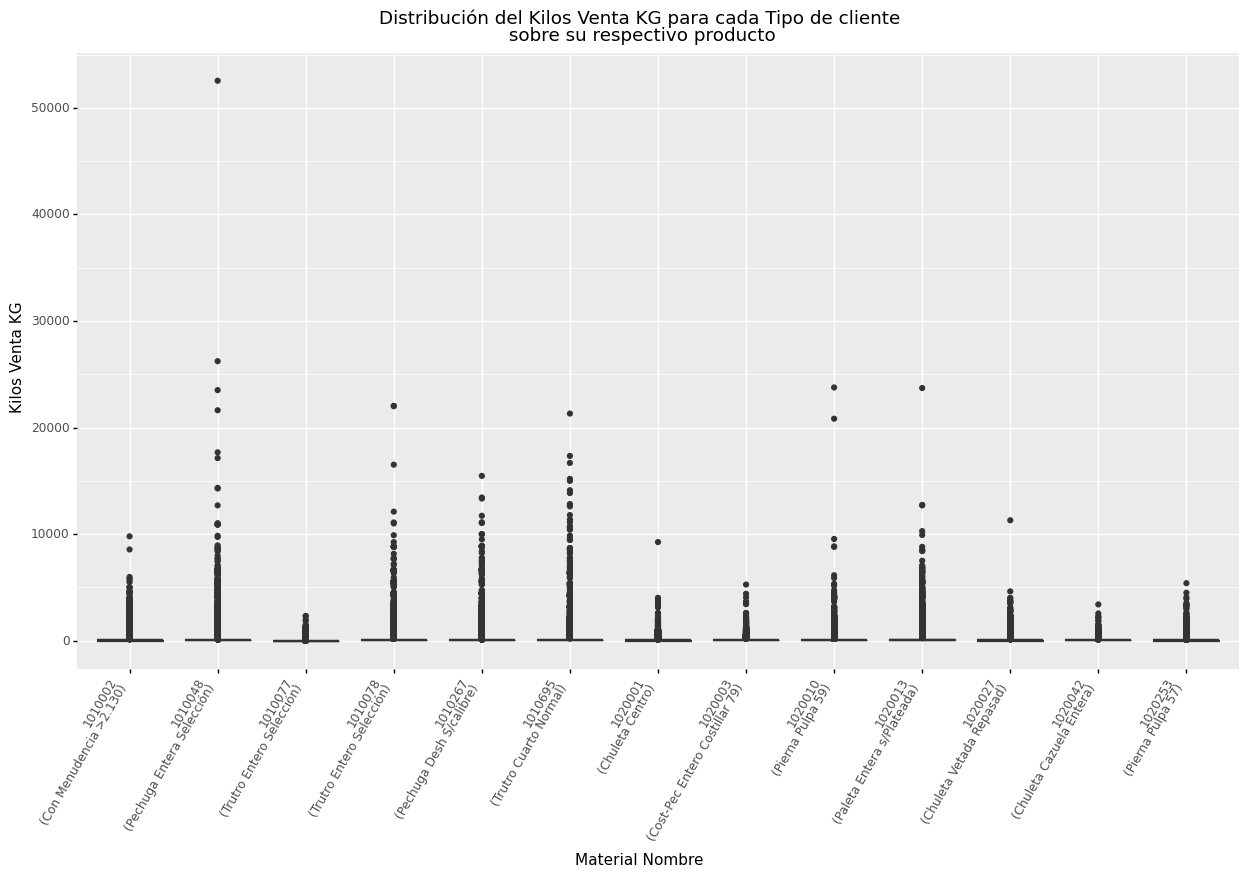

<ggplot: (189762034002)>

In [20]:
X_G='Material Nombre'
y_G='Kilos Venta KG'
Color_G='Tipo de cliente'
(ggplot(df
        ,aes(
            x=X_G,
            y= y_G ,))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

    +ggtitle('Distribución del '+y_G+' para cada '+Color_G+'\n sobre su respectivo producto')
    +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))

)

#### PDF

In [26]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
        Box_plot_Venta
                  ,file_direct_Graphic+'/Generales/'+"/Boxplot Kilogramo de Venta.pdf")
time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales//Boxplot Kilogramo de Venta.pdf


Time Lapsed = 0:1:15.94555950164795 
 H:m:s


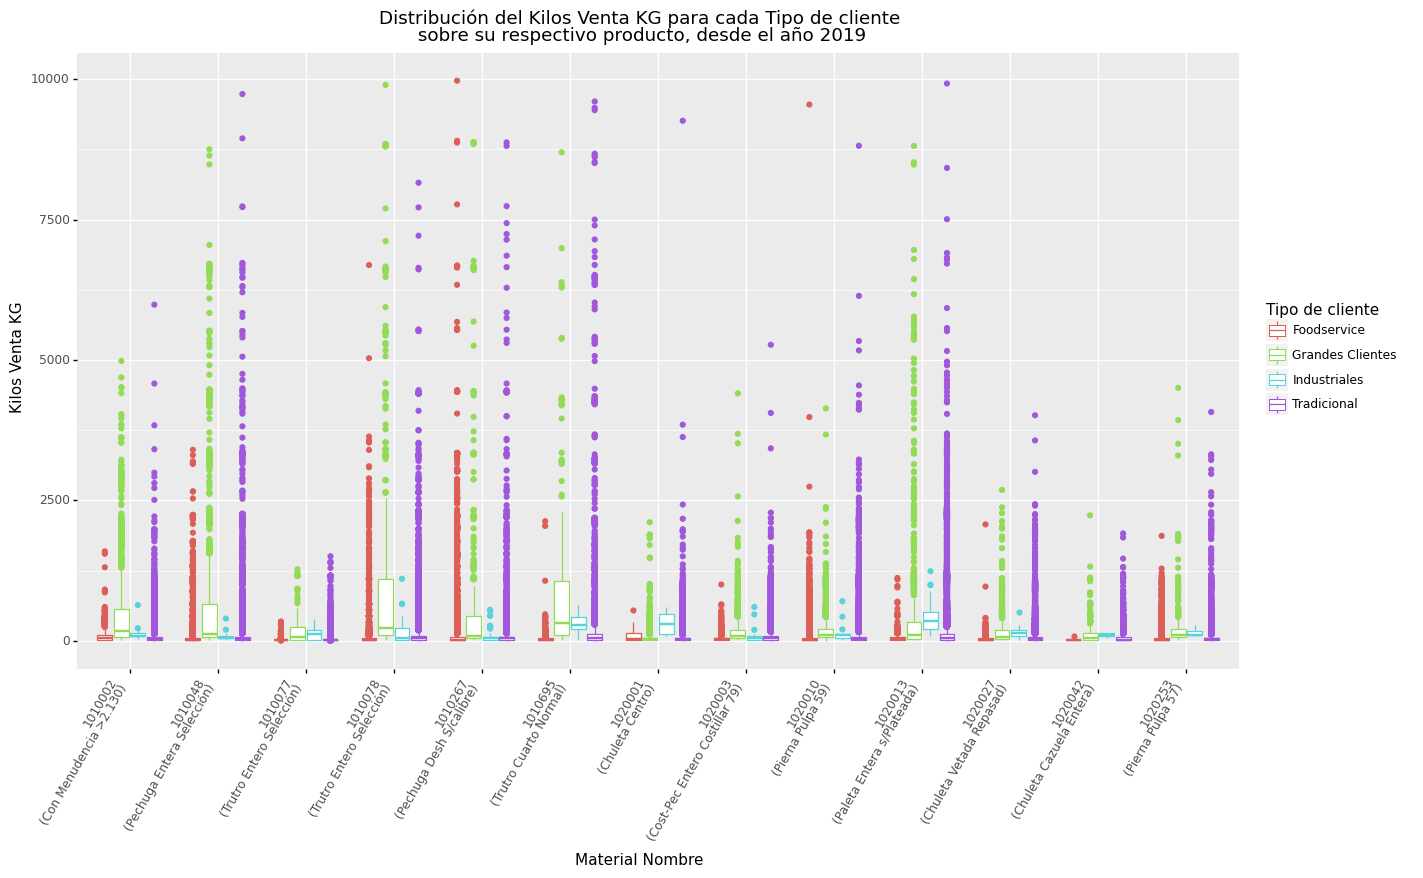

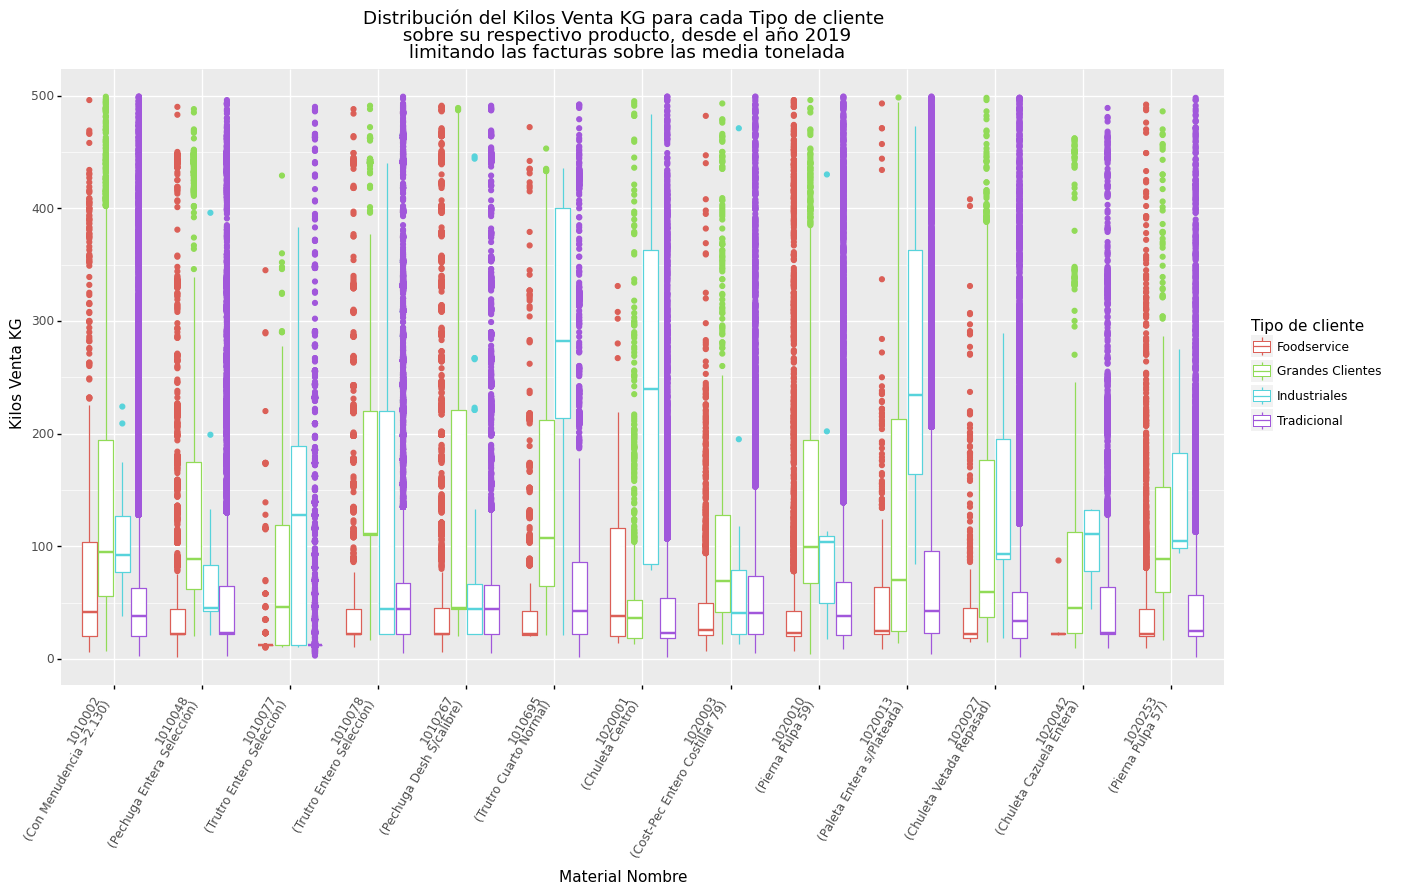

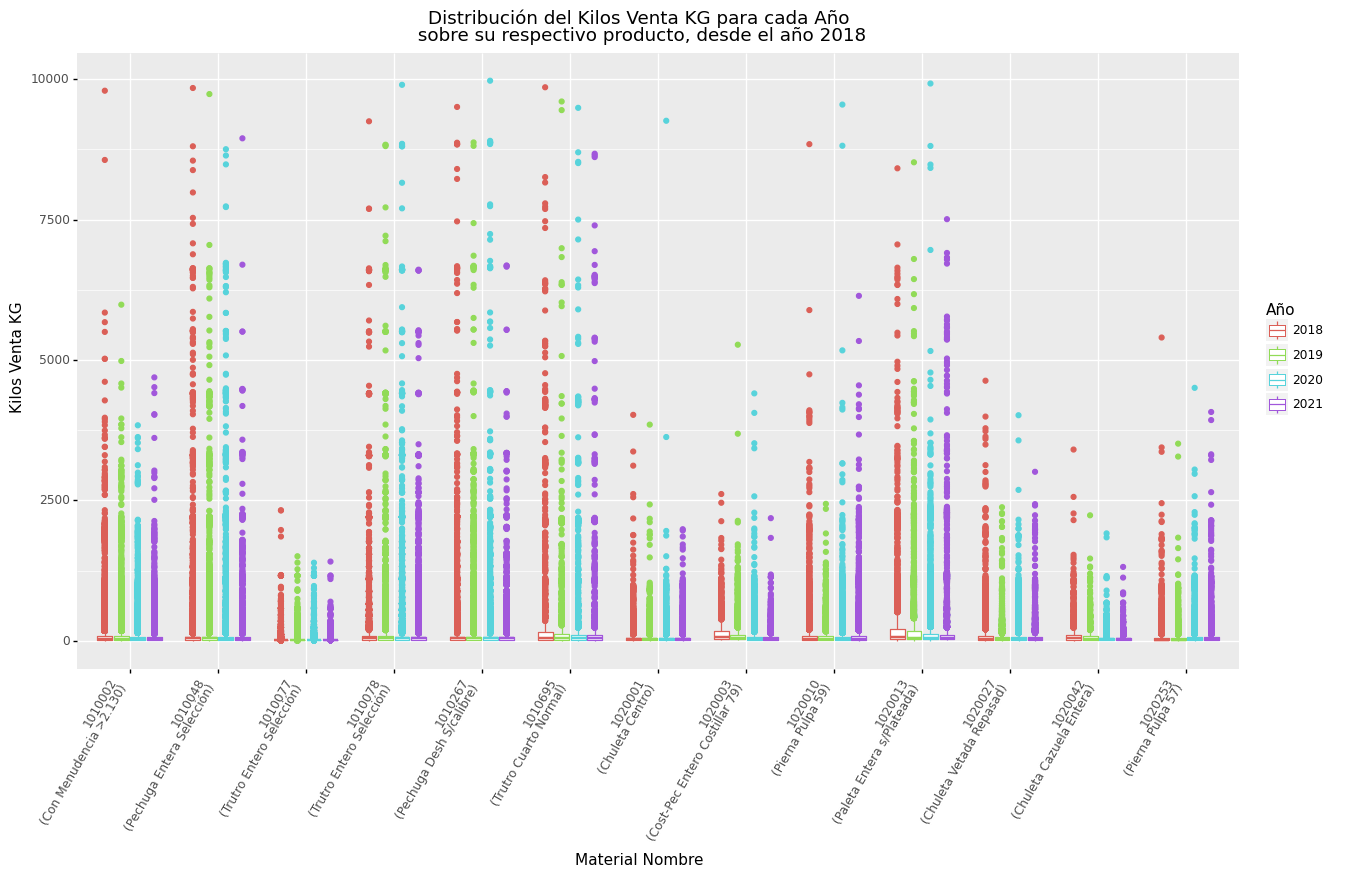

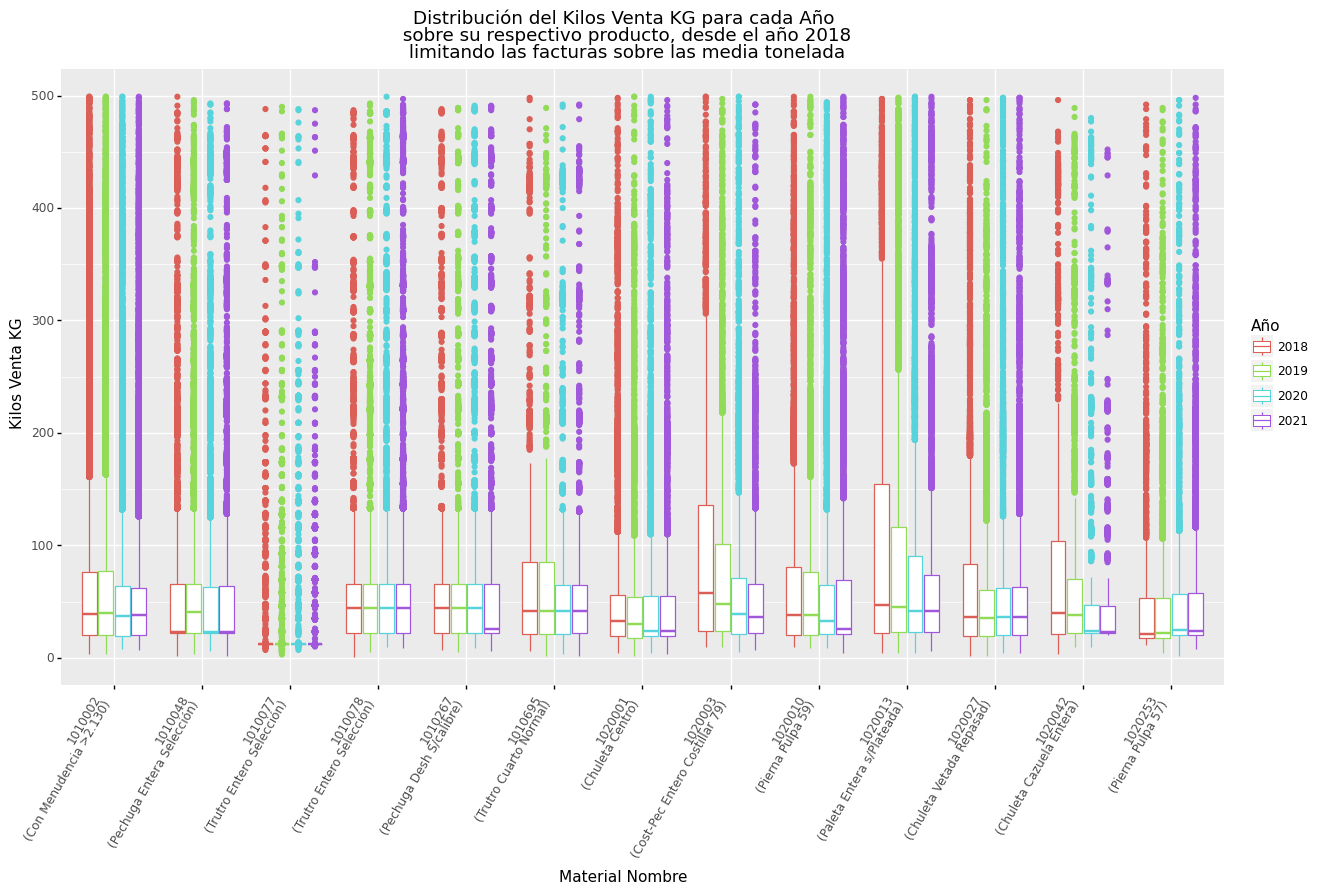

[<ggplot: (189753609725)>,
 <ggplot: (189717218774)>,
 <ggplot: (189707392196)>,
 <ggplot: (189747532445)>]

In [27]:
Box_plot_Venta